# Project 8 - Working with OLS

# Linear Algebra in numpy

Start by creating numpy arrays that will transform into vectors

In [1]:
import numpy as np

# Creating the arrays to transform
x1 = np.array([1, 2, 1])
x2 = np.array([4, 1, 5])
x3 = np.array([6, 8, 6])

print("Arrays:",x1, x2, x3, sep = "\n")

Arrays:
[1 2 1]
[4 1 5]
[6 8 6]


## Tranforming the arrays into vectors using matrix()

In [2]:
# Redefining x1, x2, and x3
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)

## Joining the vectors

In [3]:
# Use axis = 0 to stack each row on the next
X = np.concatenate((x1, x2, x3), axis = 0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

## Inverting the Matrix

In [4]:
X_inverse = X.getI()
X_inverse

matrix([[-8.5000000e+00, -1.0000000e+00,  2.2500000e+00],
        [ 1.5000000e+00, -7.6861594e-17, -2.5000000e-01],
        [ 6.5000000e+00,  1.0000000e+00, -1.7500000e+00]])

In [5]:
# Rounding the values to 2 decimal places
X_inverse = np.round(X_inverse, 2)
X_inverse

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

# Regression Function

Regression is run to estimate the parameters. Will need to define the dependent and independent variables as well as transforming these into matrix objects. 

## Ordinary Least Squares

In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Imported data to use
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          11285.0  
         2015-01-01          10947.0  
         2014-01-01          10703.0  
         2013-01-01          10138.0  
...                              ...  
ZWE      2000-01-01           2696.0  
         1995-01-01           2841.0  
         1990-01-01           3265.0  
         1985-01-01           3615.0  
         1980-01-01           4003.0  

[3030 rows x 7 columns]

In [7]:
# Change the years to start from earliest to latest
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
# Created the date range
years = pd.date_range(years[0], years[-2], freq = "AS")
# Created countries
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
# Names of the indeces
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                        years[:-1]],
                                        names = data.index.names)
multi_index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1971-01-01'),
            ('AGO', '1972-01-01'),
            ('AGO', '1973-01-01'),
            ('AGO', '1974-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1976-01-01'),
            ('AGO', '1977-01-01'),
            ('AGO', '1978-01-01'),
            ('AGO', '1979-01-01'),
            ...
            ('ZWE', '2006-01-01'),
            ('ZWE', '2007-01-01'),
            ('ZWE', '2008-01-01'),
            ('ZWE', '2009-01-01'),
            ('ZWE', '2010-01-01'),
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01')],
           names=['ISO_Code', 'Year'], length=7452)

In [8]:
index_names

['ISO_Code', 'Year']

In [9]:
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1623.0  
         2013-01-01           1801.0  
         2014-01-01           1797.0  
         2015-01-01           1759.0  

[7452 rows x 7 columns]

In [10]:
# Makes sure lag variables are sorted correctly
# Chooses RGDP Per Capita from ISO_Code
# .shift moves values down one
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      1970-01-01              NaN                  NaN  
         1971-01-01              NaN                  NaN  
         1972-01-01              NaN                  NaN  
         1973-01-01              NaN                  NaN  
         1974-01-01              NaN                  NaN  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1425.0  
         2012-01-01           1623.0               1515.0  
         2013-01-01           1801.0               1623.0  
         2014-01-01           1797.0               1801.0  
         2015-01-01           1759.0               1797.0  

[7452 rows x 8 columns]

In [11]:
data.loc["GBR"]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
1970-01-01  5.873943            3.627407                        7.124264   
1971-01-01       NaN                 NaN                             NaN   
1972-01-01       NaN                 NaN                             NaN   
1973-01-01       NaN                 NaN                             NaN   
1974-01-01       NaN                 NaN                             NaN   
1975-01-01  5.815599            3.025033                        7.402758   
1976-01-01       NaN                 NaN                             NaN   
1977-01-01       NaN                 NaN                             NaN   
1978-01-01       NaN                 NaN                             NaN   
1979-01-01       NaN                 NaN                             NaN   
1980-01-01  6.449941            3.981471                        6.249600   
1981-01-01       NaN                 NaN                             NaN   
1982-01-01       NaN                 NaN                             NaN   
1983-01-01       NaN                 NaN                             NaN   
1984-01-01       NaN                 NaN                             NaN   
1985-01-01  7.401115            4.652913                        5.903596   
1986-01-01       NaN                 NaN                             NaN   
1987-01-01       NaN                 NaN                             NaN   
1988-01-01       NaN                 NaN                             NaN   
1989-01-01       NaN                 NaN                             NaN   
1990-01-01  7.939640            5.961256                        6.862864   
1991-01-01       NaN                 NaN                             NaN   
1992-01-01       NaN                 NaN                             NaN   
1993-01-01       NaN                 NaN                             NaN   
1994-01-01       NaN                 NaN                             NaN   
1995-01-01  8.076496            5.718541                        7.848163   
1996-01-01       NaN                 NaN                             NaN   
1997-01-01       NaN                 NaN                             NaN   
1998-01-01       NaN                 NaN                             NaN   
1999-01-01       NaN                 NaN                             NaN   
2000-01-01  8.518925            7.194097                        8.248599   
2001-01-01  8.452018            6.961156                        8.234602   
2002-01-01  8.490705            7.139978                        8.144261   
2003-01-01  8.499127            7.039513                        8.245855   
2004-01-01  8.382597            6.920611                        8.069173   
2005-01-01  8.393285            6.922756                        8.265496   
2006-01-01  8.302836            6.914460                        7.982602   
2007-01-01  8.192020            6.929650                        7.644268   
2008-01-01  8.025975            6.161823                        7.807282   
2009-01-01  8.010150            6.282977                        7.979651   
2010-01-01  8.028130            6.002021                        7.971147   
2011-01-01  7.991630            6.026605                        7.966475   
2012-01-01  8.023953            6.123371                        7.825436   
2013-01-01  8.003675            6.479671                        7.812331   
2014-01-01  7.973524            6.118760                        7.829461   
2015-01-01  8.075913            6.161316                        7.921505   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
1970-01-01     7.635725                          4.215819    7.335440   
1971-01-01          NaN                               NaN         NaN   
1972-01-01          NaN                               NaN         NaN   
197

# Running an OLS Regression

In [12]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation"]
# Creates dataframe for the variables
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           3364.0            4.652865   
         2006-01-01           4558.0            5.342913   
         2007-01-01           5314.0            5.239228   
         2008-01-01           6318.0            5.307379   
         2009-01-01           5212.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1623.0            6.670469   
         2013-01-01           1801.0            6.325105   
         2014-01-01           1797.0            6.433165   
         2015-01-01           1759.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  
ISO_Code Year                                                      
AGO      2005-01-01                          6.218266    4.729310  
         2006-01-01                          6.158949    5.306135  
         2007-01-01                          6.115462    5.524626  
         2008-01-01                          5.687976    5.221726  
         2009-01-01                          5.811844    5.011598  
...                                               ...         ...  
ZWE      2011-01-01                          5.366773    4.372878  
         2012-01-01                          5.132305    3.661438  
         2013-01-01                          5.589087    3.848068  
         2014-01-01                          5.909121    3.987721  
         2015-01-01                          5.679719    6.643620  

[2579 rows x 6 columns]

In [13]:
reg_data.corr().round(2)

RGDP Per Capita  Size of Government  \
RGDP Per Capita                              1.00               -0.15   
Size of Government                          -0.15                1.00   
Legal System & Property Rights               0.68               -0.10   
Sound Money                                  0.44                0.20   
Freedom to trade internationally             0.49                0.24   
Regulation                                   0.50                0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.68         0.44   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.49        0.50  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [14]:
reg_data.describe().round(2)

RGDP Per Capita  Size of Government  Legal System & Property Rights  \
count          2579.00             2579.00                         2579.00   
mean          15913.65                6.35                            5.23   
std           17204.60                1.24                            1.74   
min             432.00                1.57                            0.99   
25%            3472.50                5.52                            3.96   
50%           10032.00                6.42                            5.17   
75%           23393.50                7.18                            6.35   
max          156144.00                9.51                            9.14   

       Sound Money  Freedom to trade internationally  Regulation  
count      2579.00                           2579.00     2579.00  
mean          7.76                              6.90        6.66  
std           1.85                              1.52        1.17  
min           0.00                              0.00        2.10  
25%           6.74                              6.18        5.93  
50%           8.11                              7.15        6.75  
75%           9.32                              7.98        7.48  
max           9.89                             10.00        9.44

In [15]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     513.2
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:06:17   Log-Likelihood:                -27920.
No. Observations:                2579   AIC:                         5.585e+04
Df Residuals:                    2573   BIC:                         5.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2325.3408    217.288    -10.702      0.000   -2751.418   -1899.263
Legal System & Property Rights    4725.0365    202.938     23.283      0.000    4327.099    5122.974
Sound Money                        747.3062    185.243      4.034      0.000     384.067    1110.546
Freedom to trade internationally   782.7867    256.383      3.053      0.002     280.049    1285.524
Regulation                        2374.8726    297.133      7.993      0.000    1792.229    2957.516
Constant                         -2.103e+04   1704.117    -12.339      0.000   -2.44e+04   -1.77e+04
==============================================================================
Omnibus:                     2065.733   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76781.322
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      28.796   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Year'>

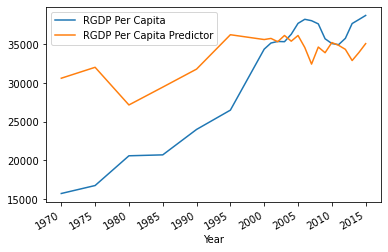

In [16]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data.loc["GBR", [y_var[0], y_var[0] + " Predictor"]].plot()

# OLS Statistics

Since the predictor is saved, can generate the following which will generate r^2 value. This is used to estimate the variance.

SSE, SSR, and SST

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

$SST = SSR + SSE$

In [17]:
# Renaming y_var[0] for readability
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]
# Creates a tuple for the data
y_hat, y_mean, y

(ISO_Code  Year      
 AGO       2005-01-01      73.776545
           2006-01-01    3763.314400
           2007-01-01    4889.656730
           2008-01-01    4511.502334
           2009-01-01     -64.940780
                            ...     
 ZWE       2011-01-01     324.435212
           2012-01-01    -844.258736
           2013-01-01    -172.556682
           2014-01-01    1146.758144
           2015-01-01    8472.316273
 Name: RGDP Per Capita Predictor, Length: 2579, dtype: float64,
 15913.645599069407,
 ISO_Code  Year      
 AGO       2005-01-01    3364.0
           2006-01-01    4558.0
           2007-01-01    5314.0
           2008-01-01    6318.0
           2009-01-01    5212.0
                          ...  
 ZWE       2011-01-01    1515.0
           2012-01-01    1623.0
           2013-01-01    1801.0
           2014-01-01    1797.0
           2015-01-01    1759.0
 Name: RGDP Per Capita, Length: 2579, dtype: float64)

In [18]:
# Calculating SSE, SSR, and SST
# Creates a residuals column
reg_data["Residuals"] = y_hat.sub(y_mean)
reg_data["Residuals"]

ISO_Code  Year      
AGO       2005-01-01   -15839.869054
          2006-01-01   -12150.331199
          2007-01-01   -11023.988869
          2008-01-01   -11402.143265
          2009-01-01   -15978.586379
                            ...     
ZWE       2011-01-01   -15589.210387
          2012-01-01   -16757.904335
          2013-01-01   -16086.202281
          2014-01-01   -14766.887455
          2015-01-01    -7441.329326
Name: Residuals, Length: 2579, dtype: float64

In [19]:
# Creating Squared Residuals
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Residuals"]

ISO_Code  Year      
AGO       2005-01-01    2.509015e+08
          2006-01-01    1.476305e+08
          2007-01-01    1.215283e+08
          2008-01-01    1.300089e+08
          2009-01-01    2.553152e+08
                            ...     
ZWE       2011-01-01    2.430235e+08
          2012-01-01    2.808274e+08
          2013-01-01    2.587659e+08
          2014-01-01    2.180610e+08
          2015-01-01    5.537338e+07
Name: Squared Residuals, Length: 2579, dtype: float64

In [20]:
# ** 2 squares the data
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           3364.0            4.652865   
         2006-01-01           4558.0            5.342913   
         2007-01-01           5314.0            5.239228   
         2008-01-01           6318.0            5.307379   
         2009-01-01           5212.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1623.0            6.670469   
         2013-01-01           1801.0            6.325105   
         2014-01-01           1797.0            6.433165   
         2015-01-01           1759.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AGO      2005-01-01                  73.776545 -15839.869054   
         2006-01-01                3763.314400 -12150.331199   
         2007-01-01                4889.656730 -11023.988869   
         2008-01-01                4511.502334 -11402.143265   
         2009-01-01                 -64.940780 -15978.586379   
...                                        ...           ...   
ZWE      2011-01-01                 324.435212 -15589.210387   
         2012-01-01                -844.258736 -16757.904335   
         2013-01-01                -172.556682 -16086.202281   
         2014-01-01                1146.758144 -14766.887455   
         2015-01-01                8472.316273  -7441.329326   

                     Squared Residuals  Squared Errors  Squared Totals  
ISO_Code Year                                                           
AGO      2005-01-01       2.509015e+08    1.082557e+07    1.574936e+08  
         2006-01-01       1.476305e+08    6.315252e+05    1.289507e+08  
         2007-01-01       1.215283e+08    1.800672e+05    1.123525e+08  
         2008-01-01       1.300089e+08    3.263434e+06    9.207641e+07  
         2009-01-01       2.553152e+08    2.784610e+07    1.145252e+08  
...                                ...             ...             ...  
ZWE      2011-01-01       2.430235e+08  

In [21]:
# Renames these columns
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

SSR, SSE, SST

(381036440167.77356, 382046962202.3041, 763083402370.0775)

## Calculating Estimator Variance

Used to construct the covariance matrix. This is used to derive the standard errors and related statistics for each coefficient.

In [22]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(2579.0, 6, 148483078.97485584)

In [23]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                      47214.173521   
Legal System & Property Rights          16858.274177   
Sound Money                             -2707.751698   
Freedom to trade internationally       -13524.761306   
Regulation                             -11325.259004   
Constant                              -198025.802376   

                                  Legal System & Property Rights  \
Size of Government                                  16858.274177   
Legal System & Property Rights                      41183.740950   
Sound Money                                         -3955.450072   
Freedom to trade internationally                   -19938.341690   
Regulation                                         -19608.760367   
Constant                                           -23422.832046   

                                   Sound Money  \
Size of Government                -2707.751698   
Legal System & Property Rights    -3955.450072   
Sound Money                       34314.816773   
Freedom to trade internationally -18661.975744   
Regulation                       -12691.037608   
Constant                         -15057.314064   

                                  Freedom to trade internationally  \
Size of Government                                   -13524.761306   
Legal System & Property Rights                       -19938.341690   
Sound Money                                          -18661.975744   
Freedom to trade internationally                      65732.182419   
Regulation                                           -17035.902546   
Constant                                              -5514.276728   

                                     Regulation      Constant  
Size of Government                -11325.259004 -1.980258e+05  
Legal System & Property Rights    -19608.760367 -2.342283e+04  
Sound Money                       -12691.037608 -1.505731e+04  
Freedom to trade internationally  -17035.902546 -5.514277e+03  
Regulation                         88287.874682 -1.971946e+05  
Constant                         -197194.568344  2.904015e+06

In [24]:
results.params

Size of Government                  -2325.340766
Legal System & Property Rights       4725.036489
Sound Money                           747.306175
Freedom to trade internationally      782.786662
Regulation                           2374.872619
Constant                           -21027.253069
dtype: float64

## Calculating T-stats

In [25]:
parameters = {}
for x_var in X.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var,x_var] ** (1/2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"]

pd.DataFrame(parameters).T

Beta  Standard Error    t_stats
Size of Government                -2325.340766      217.288227 -10.701642
Legal System & Property Rights     4725.036489      202.937776  23.283179
Sound Money                         747.306175      185.242589   4.034203
Freedom to trade internationally    782.786662      256.382882   3.053194
Regulation                         2374.872619      297.132756   7.992631
Constant                         -21027.253069     1704.116995 -12.339090

In [26]:
r2 = SSR / SST
"R^2", r2

('R^2', 0.49933786920840384)

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     513.2
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:06:43   Log-Likelihood:                -27920.
No. Observations:                2579   AIC:                         5.585e+04
Df Residuals:                    2573   BIC:                         5.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2325.3408    217.288    -10.702      0.000   -2751.418   -1899.263
Legal System & Property Rights    4725.0365    202.938     23.283      0.000    4327.099    5122.974
Sound Money                        747.3062    185.243      4.034      0.000     384.067    1110.546
Freedom to trade internationally   782.7867    256.383      3.053      0.002     280.049    1285.524
Regulation                        2374.8726    297.133      7.993      0.000    1792.229    2957.516
Constant                         -2.103e+04   1704.117    -12.339      0.000   -2.44e+04   -1.77e+04
==============================================================================
Omnibus:                     2065.733   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76781.322
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      28.796   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotting Residuals

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

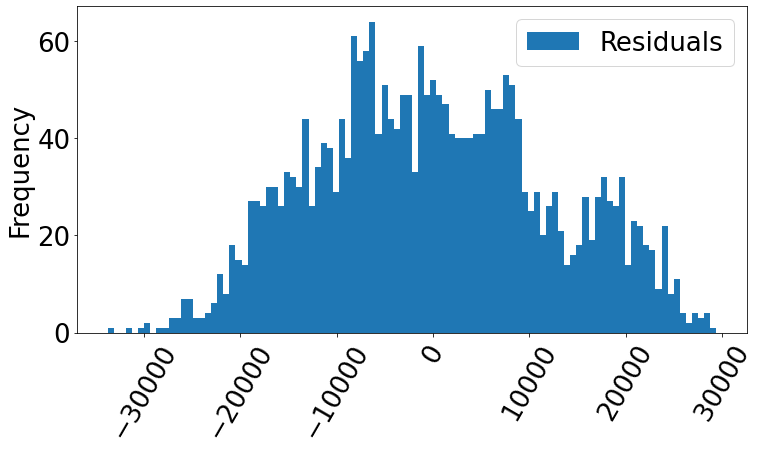

In [29]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize = (12, 6))
reg_data[["Residuals"]].plot.hist(bins = 100, 
                                  ax = ax)
plt.xticks(rotation = 60)

<AxesSubplot:ylabel='Frequency'>

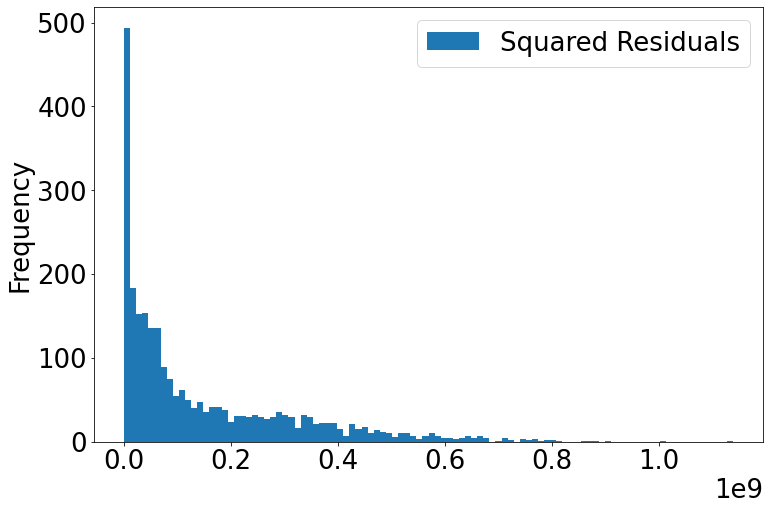

In [30]:
fig, ax = plt.subplots(figsize = (12, 8))
reg_data[["Squared Residuals"]].plot.hist(bins = 100, 
                                         ax = ax)

<ipython-input-31-f8756a44c6ca>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


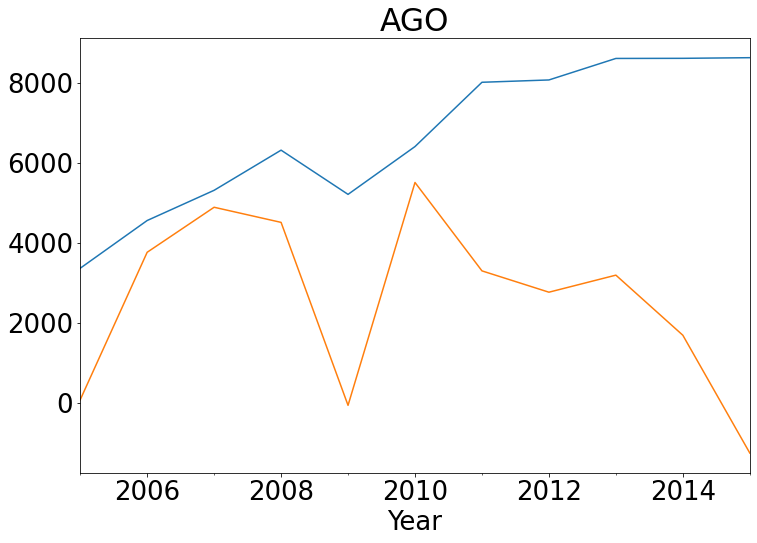

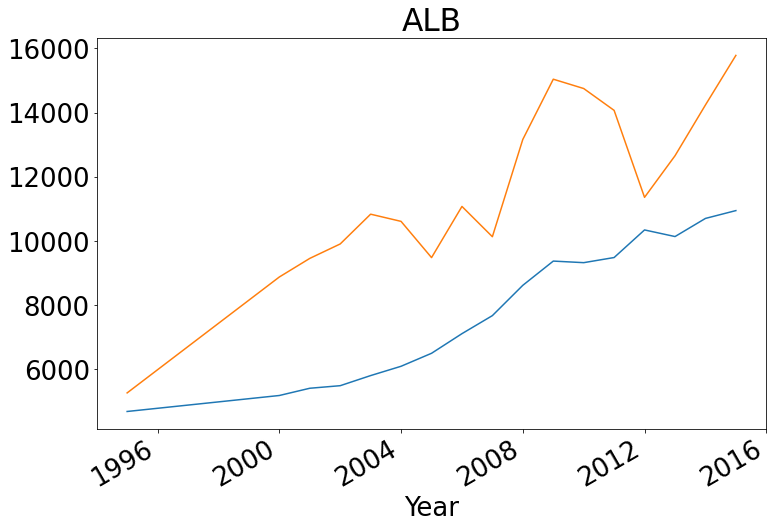

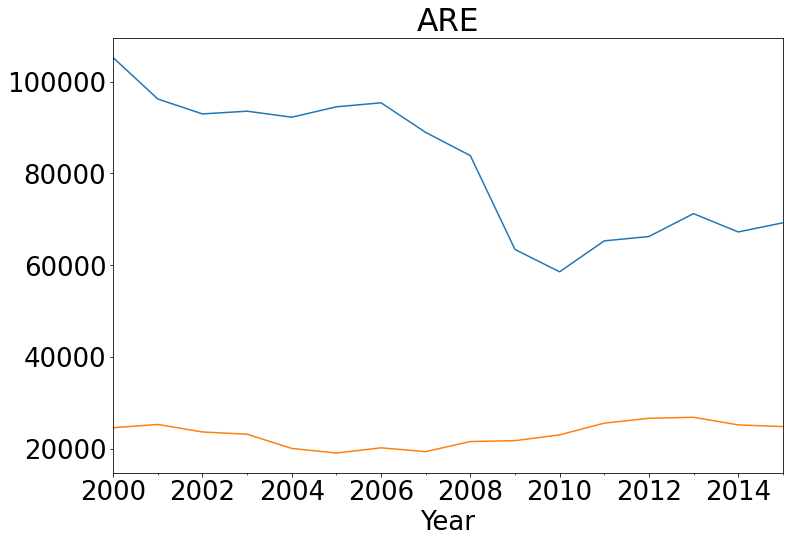

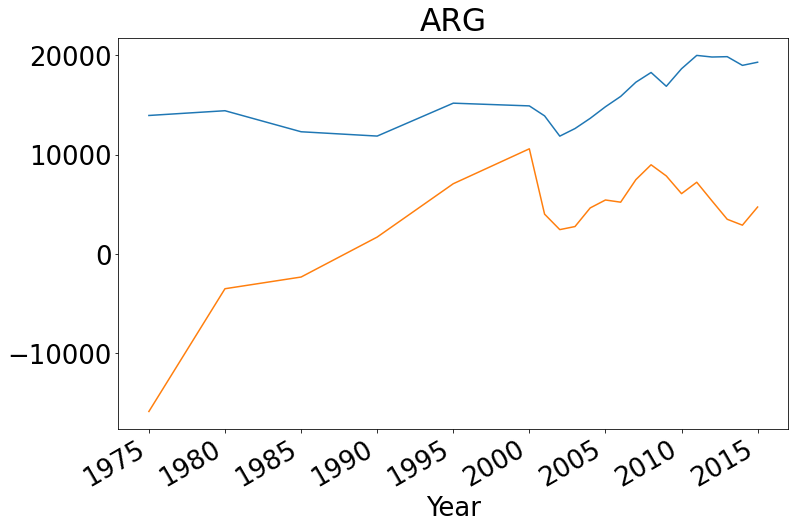

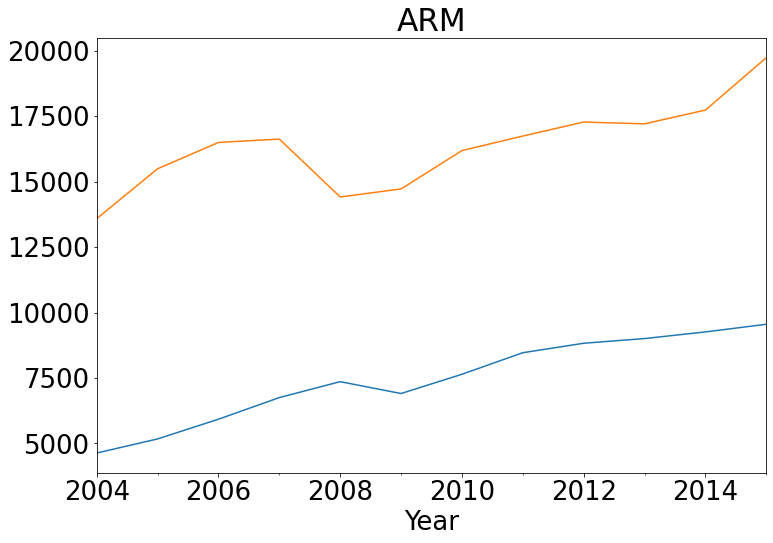

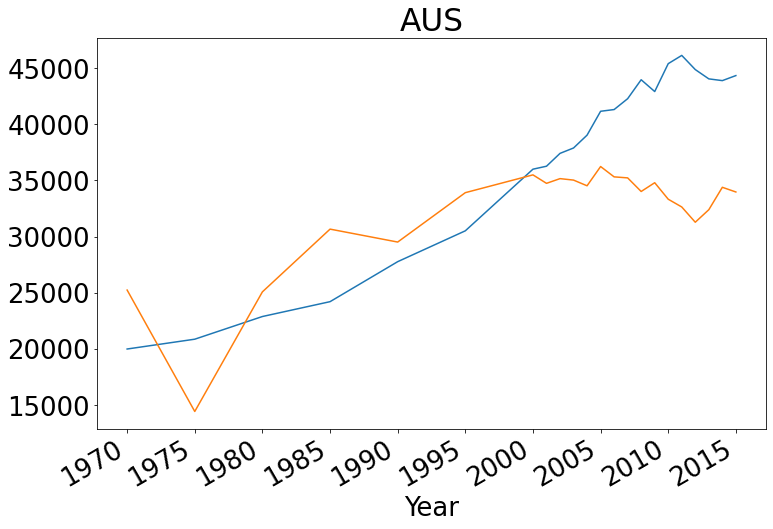

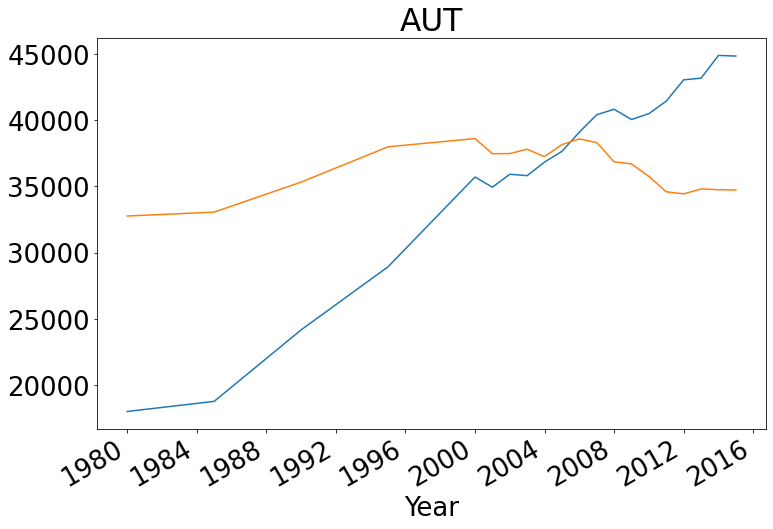

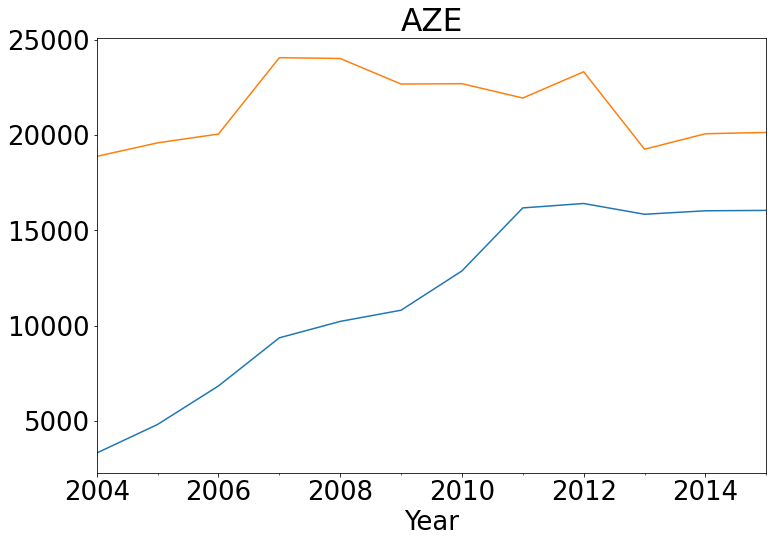

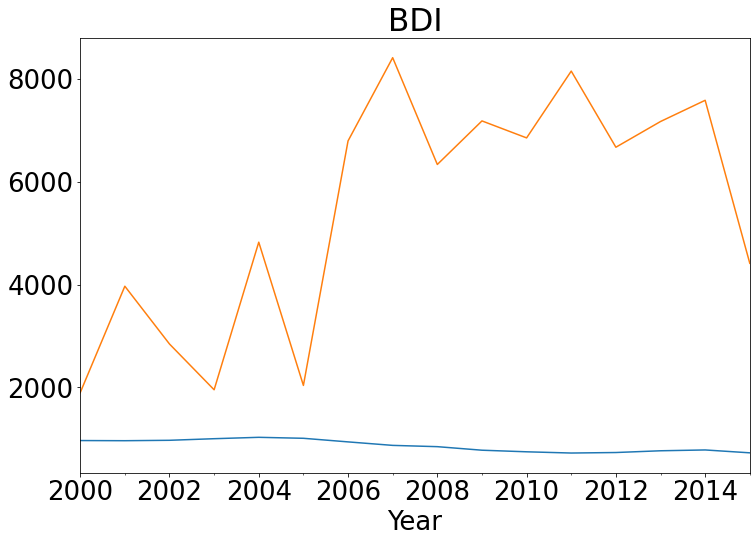

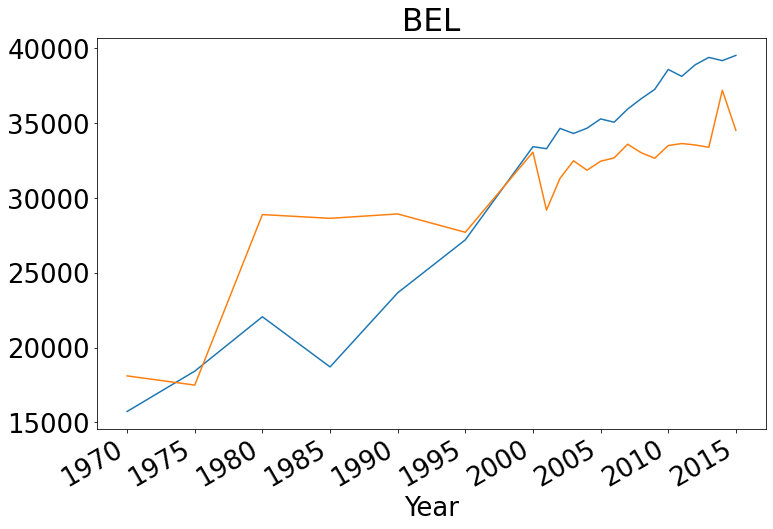

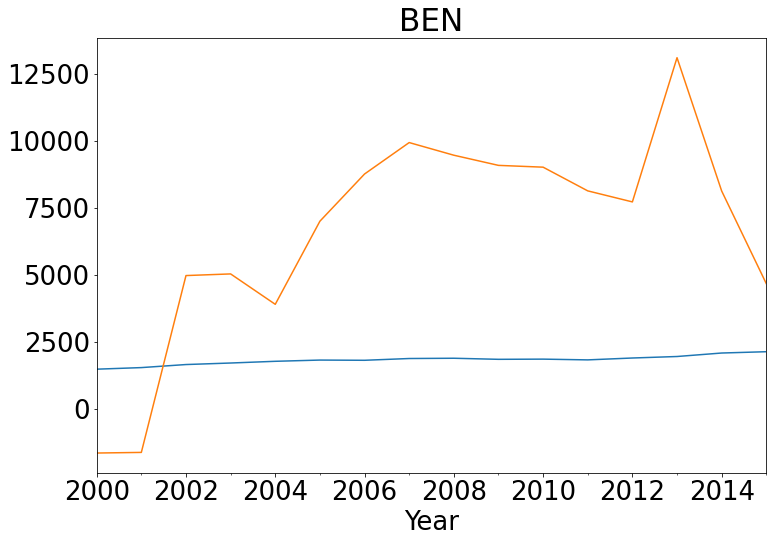

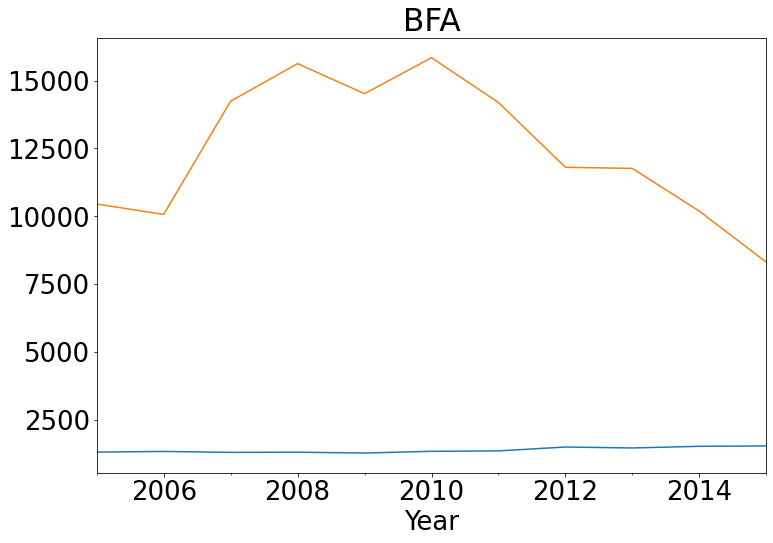

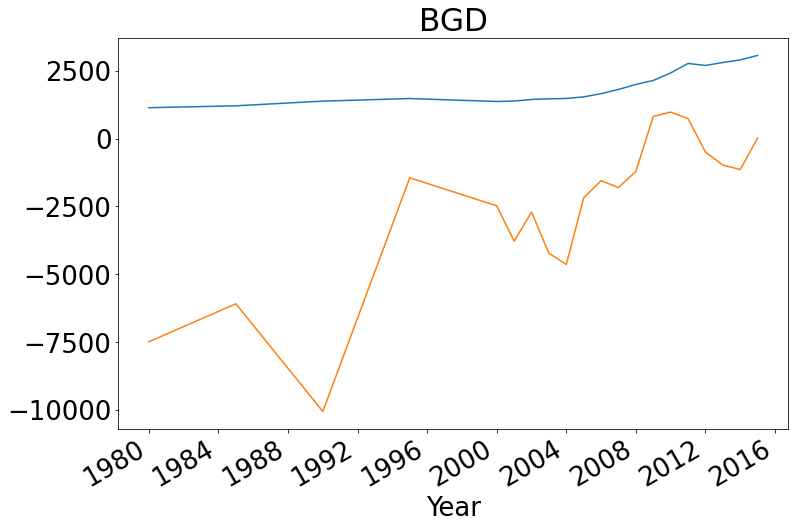

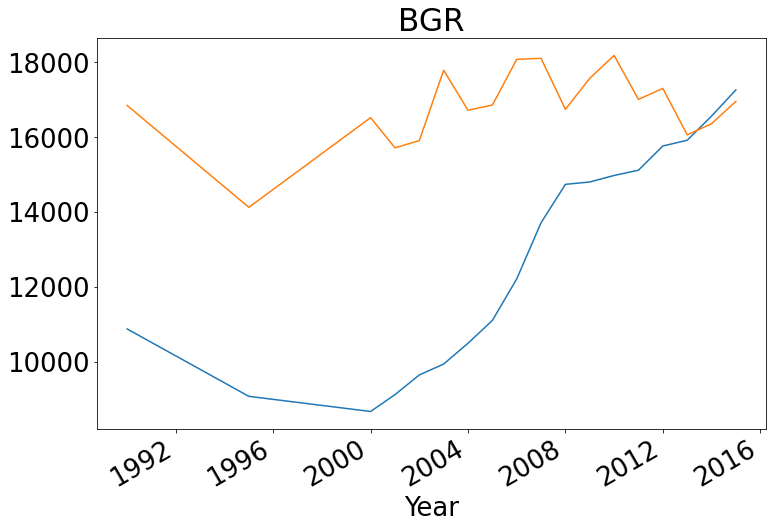

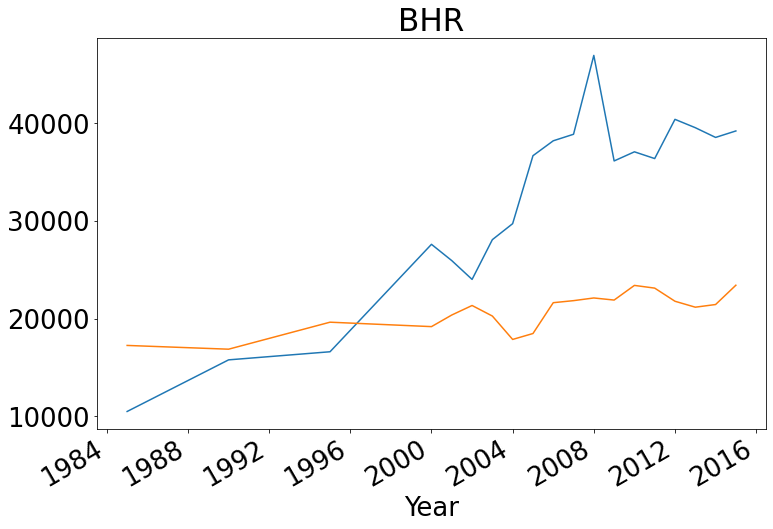

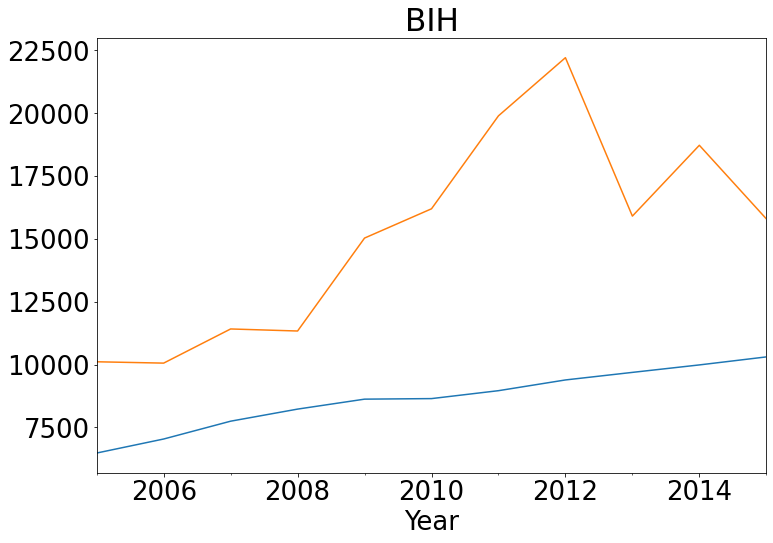

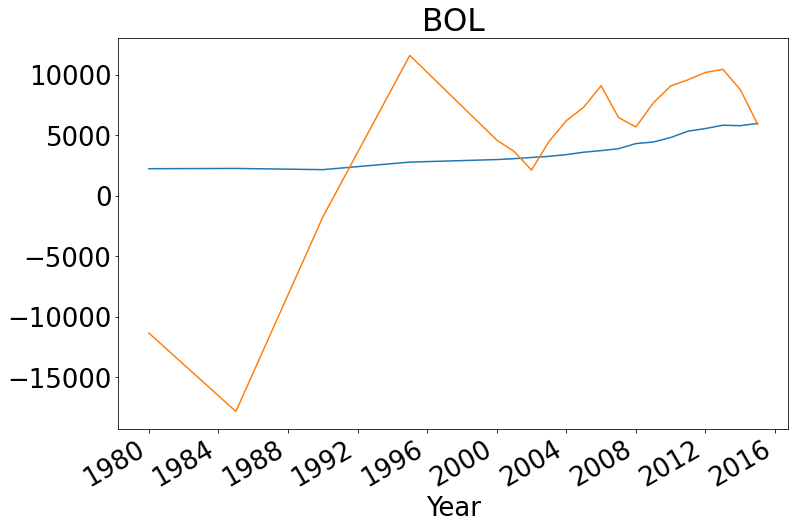

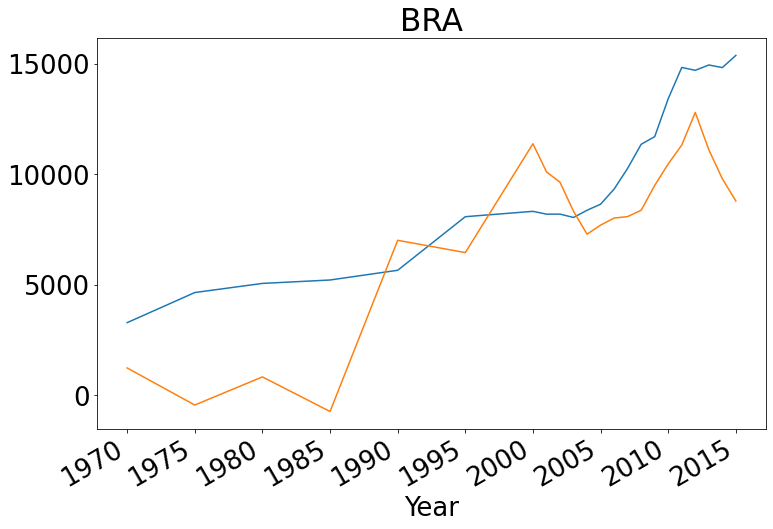

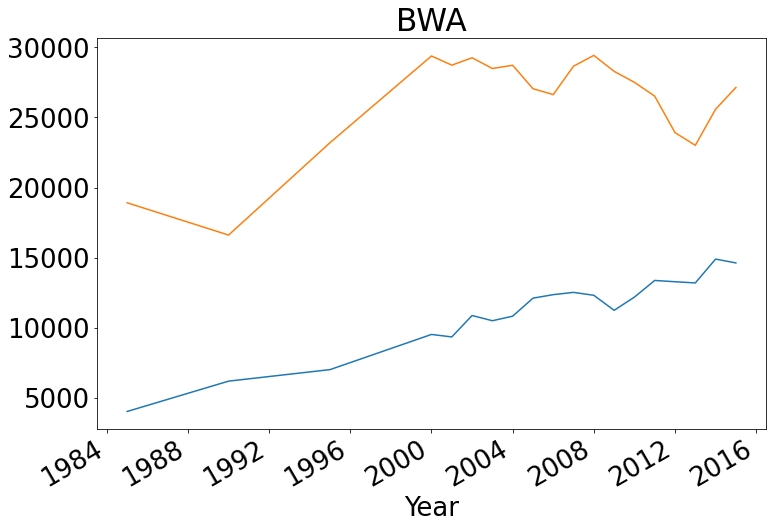

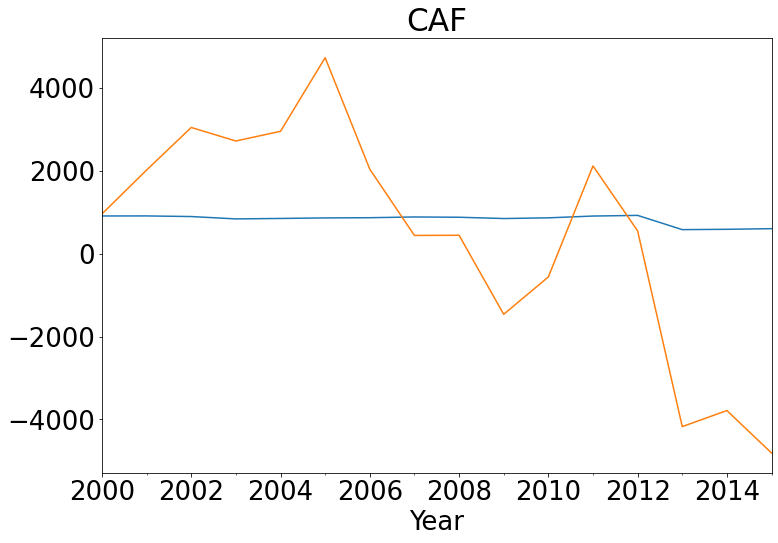

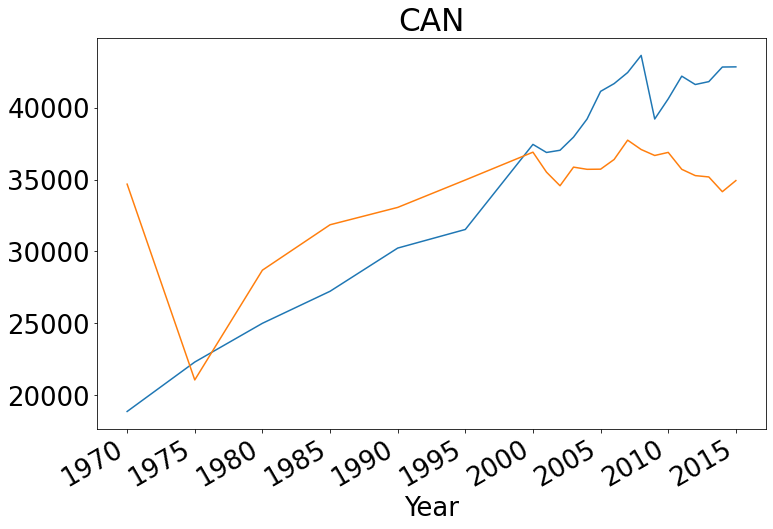

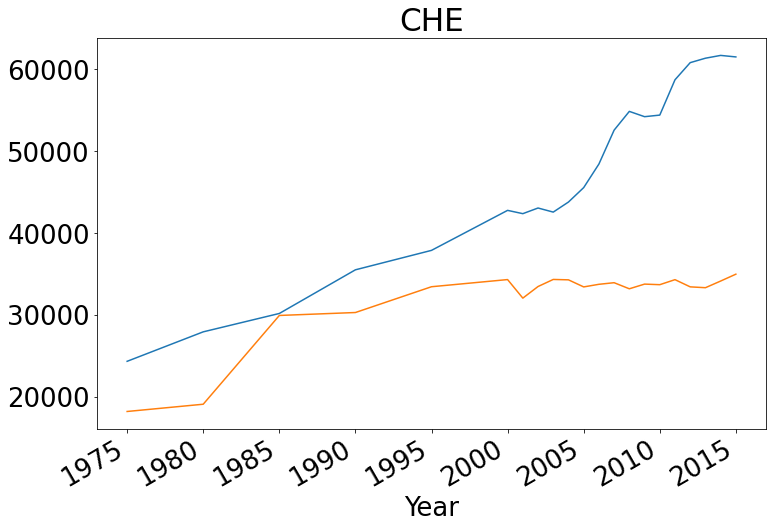

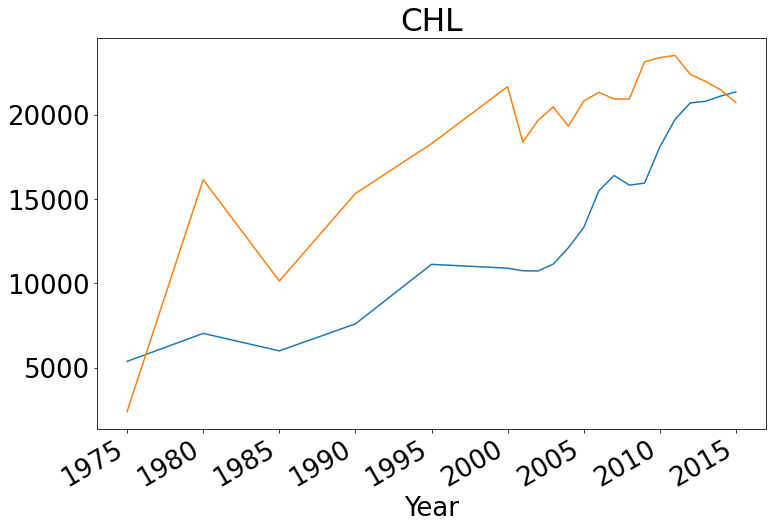

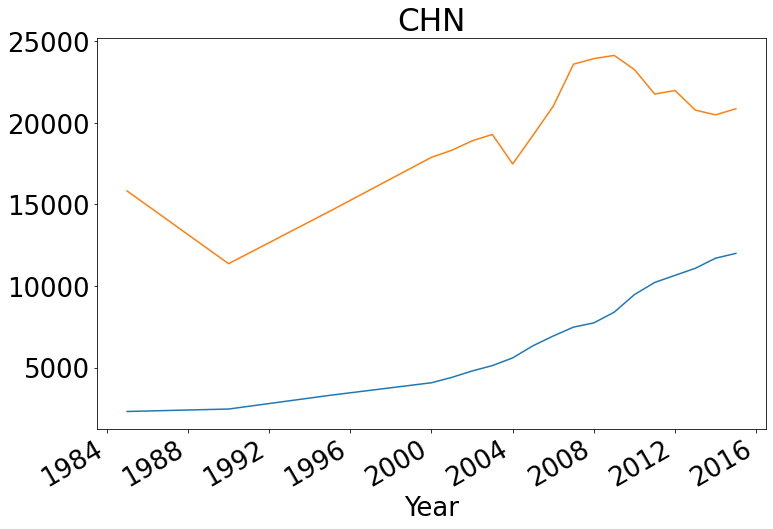

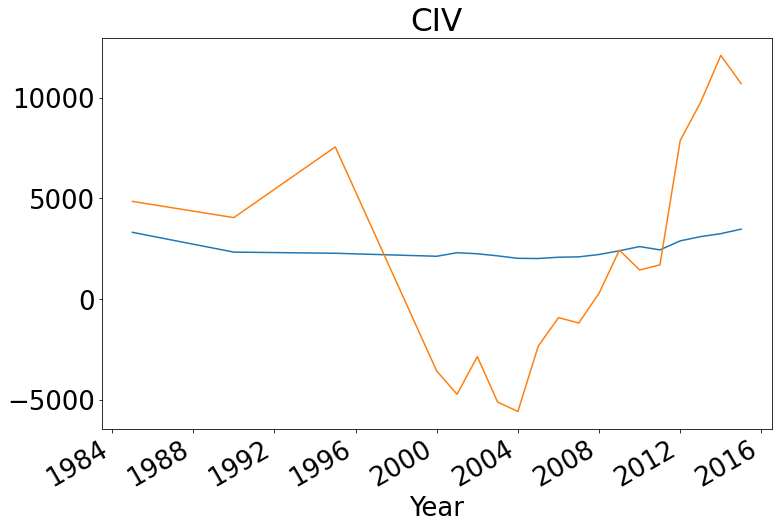

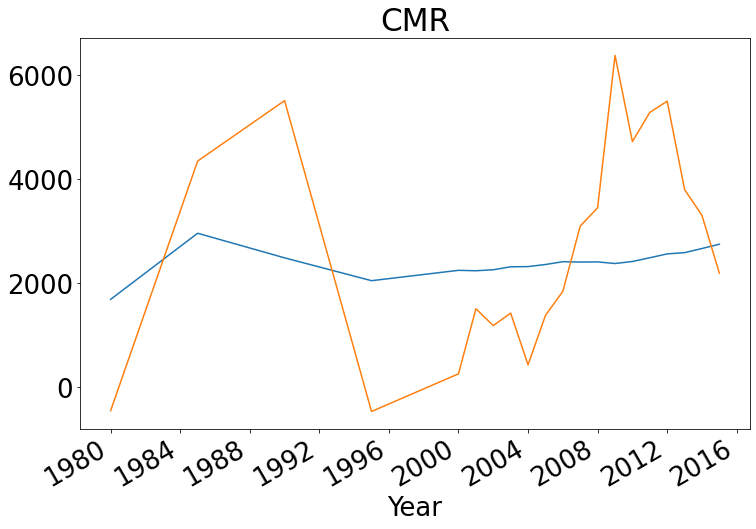

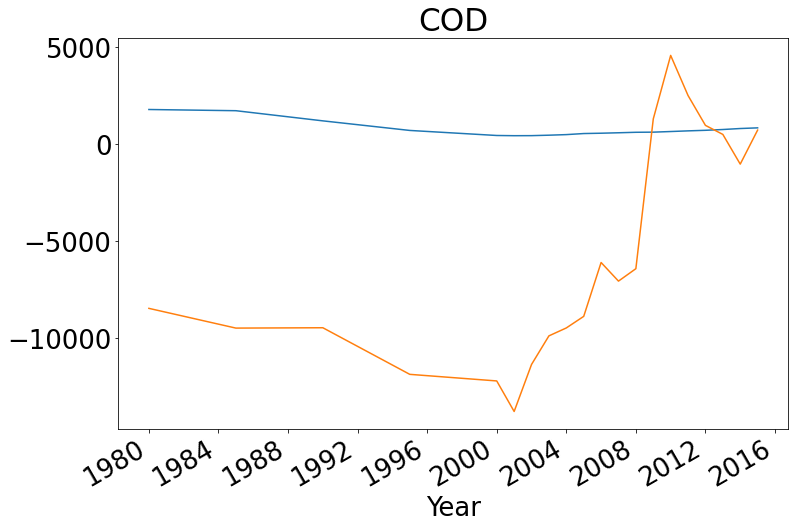

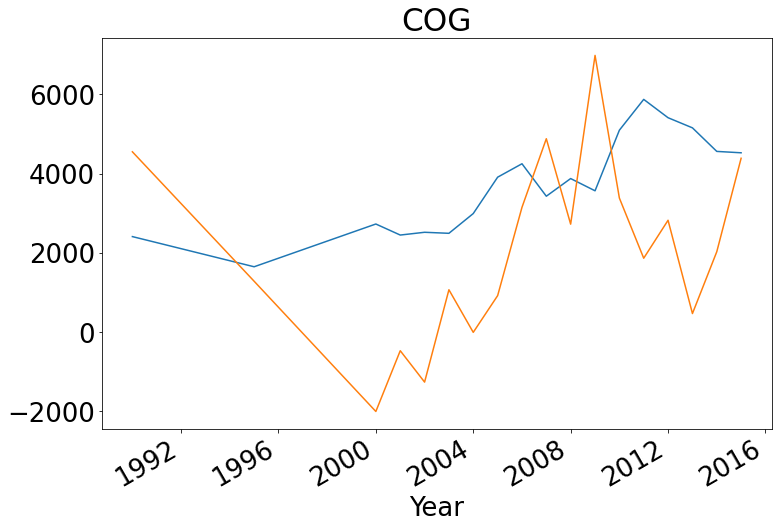

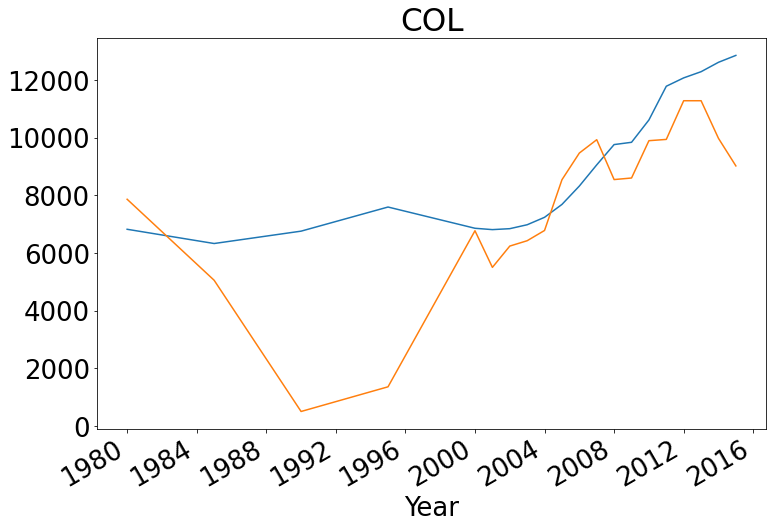

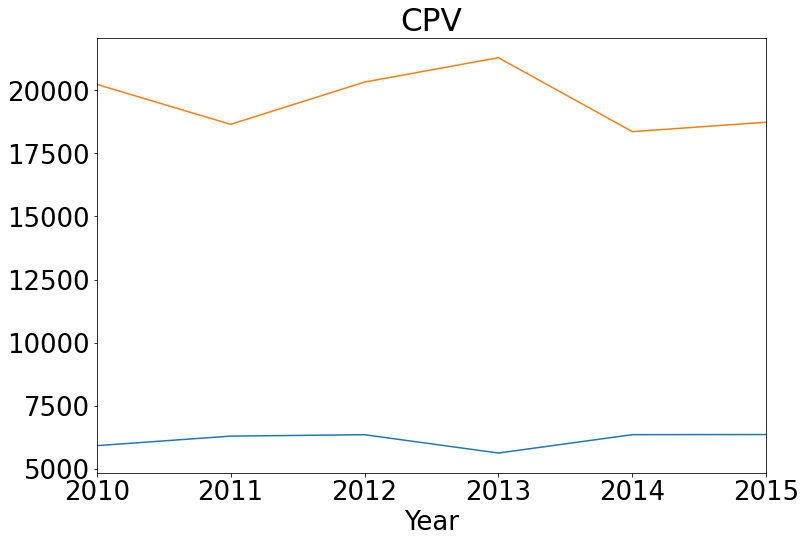

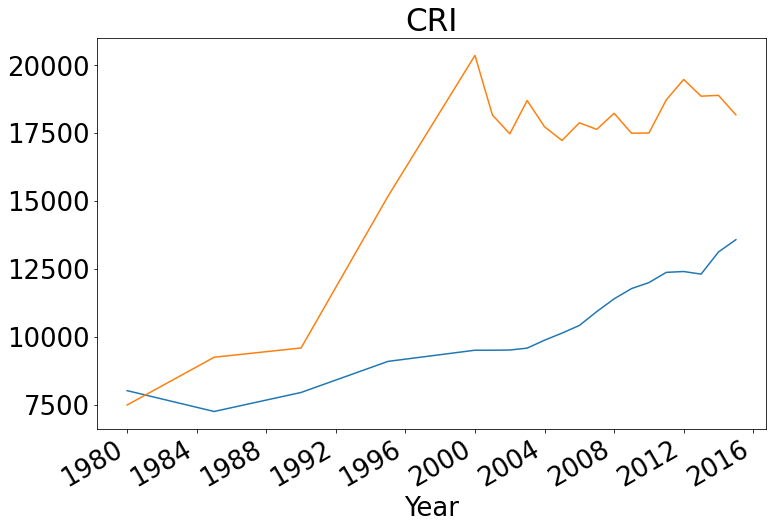

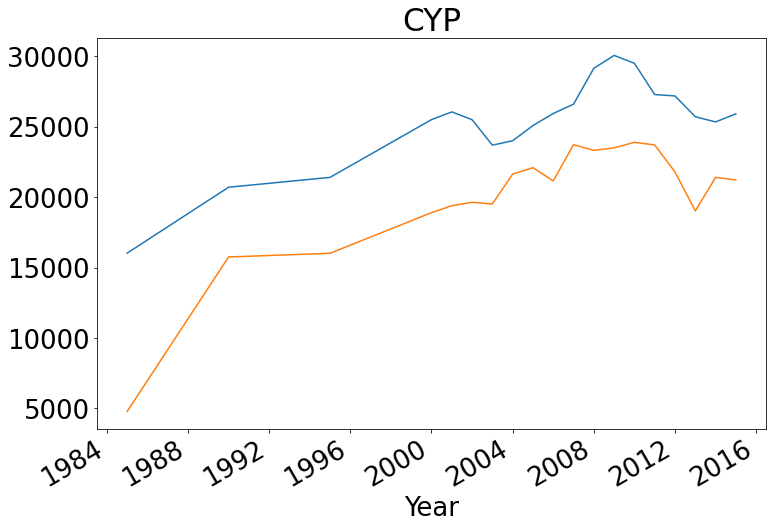

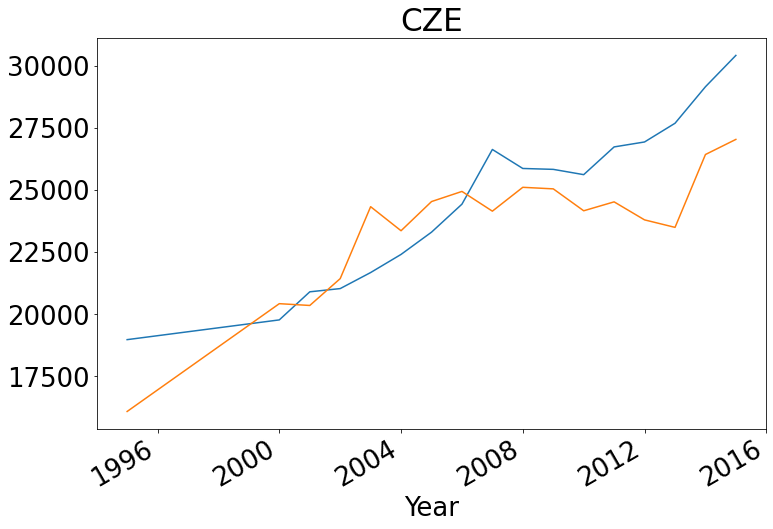

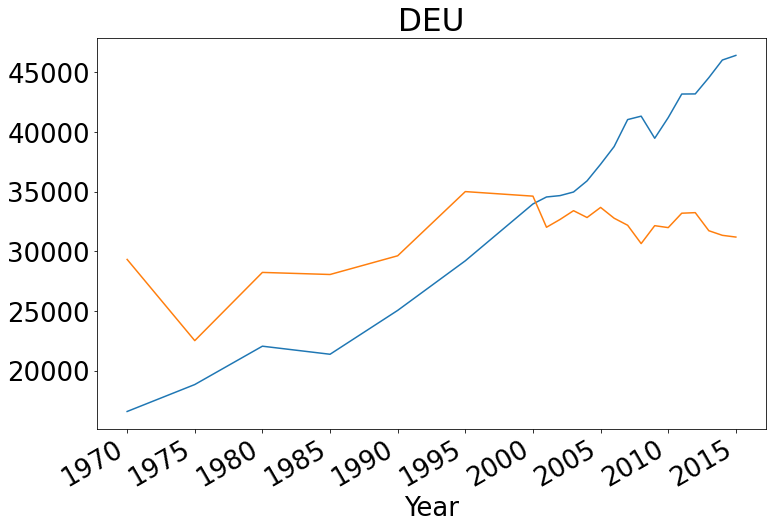

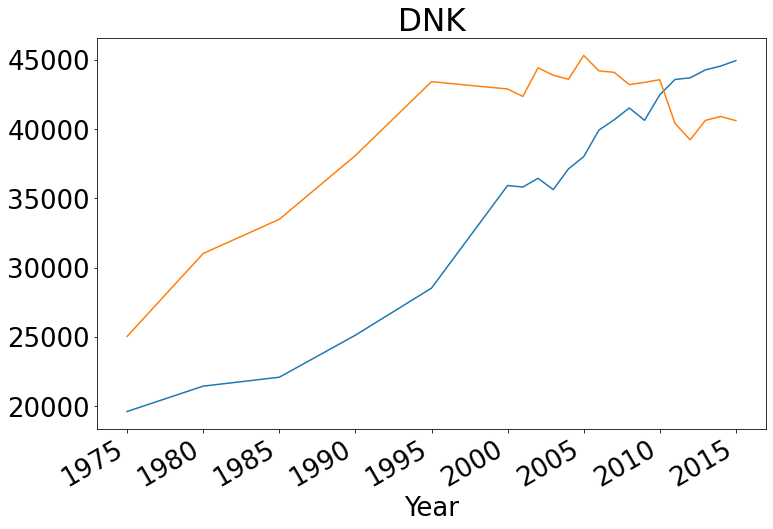

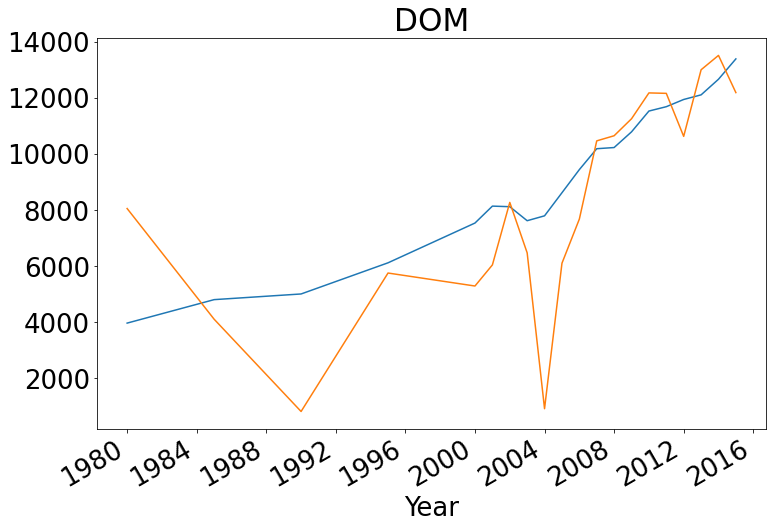

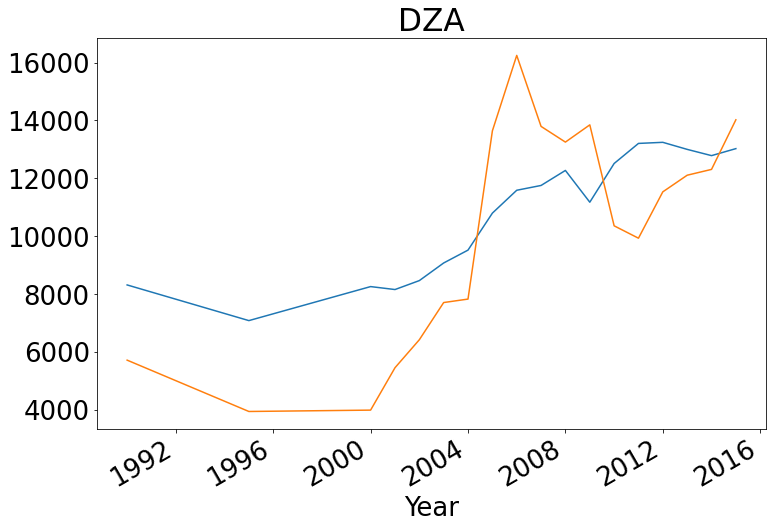

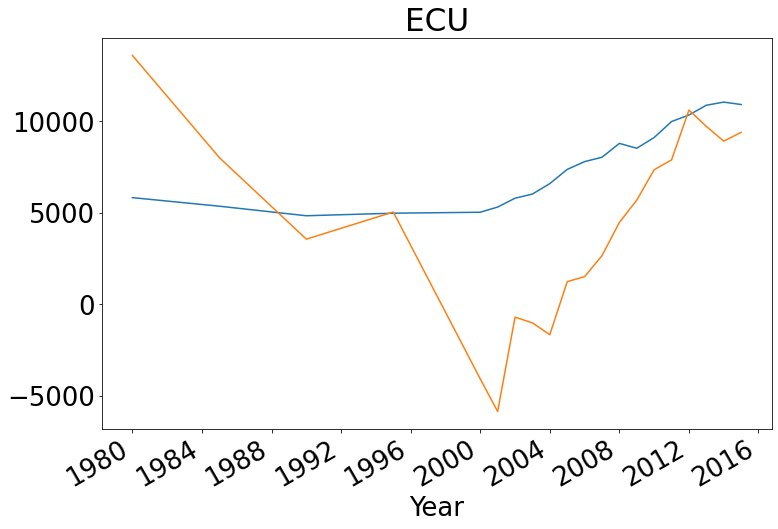

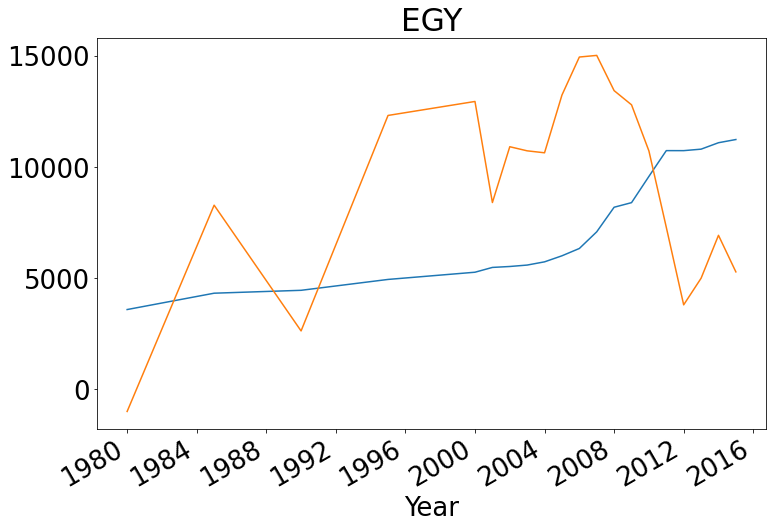

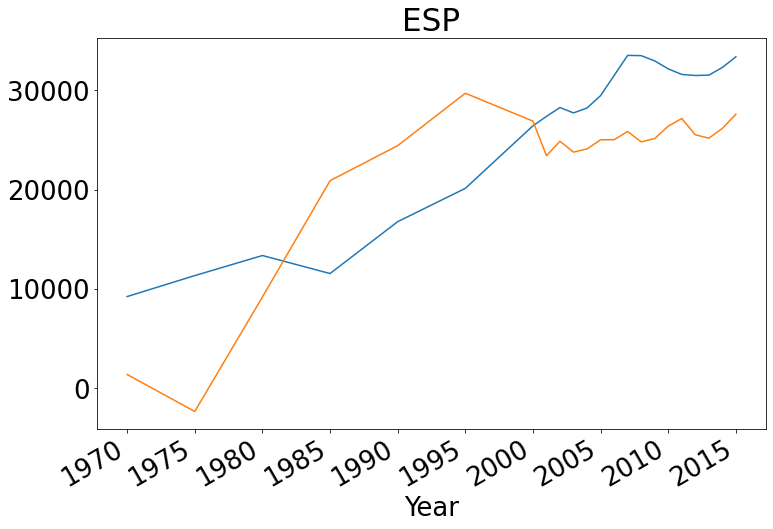

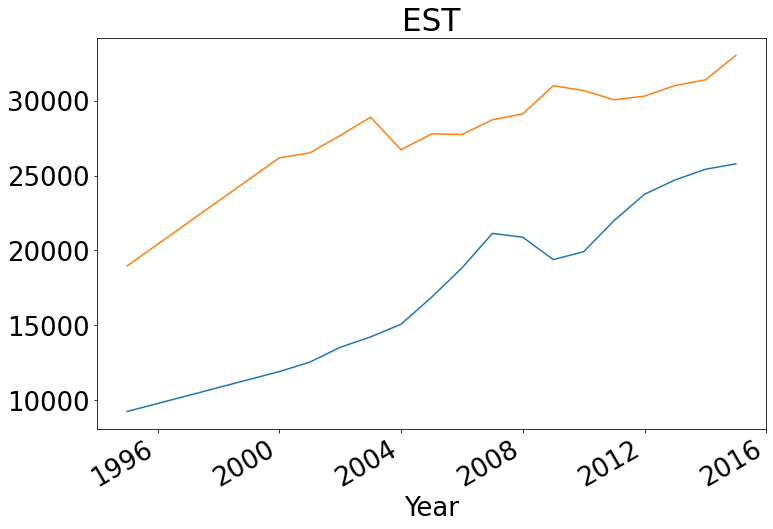

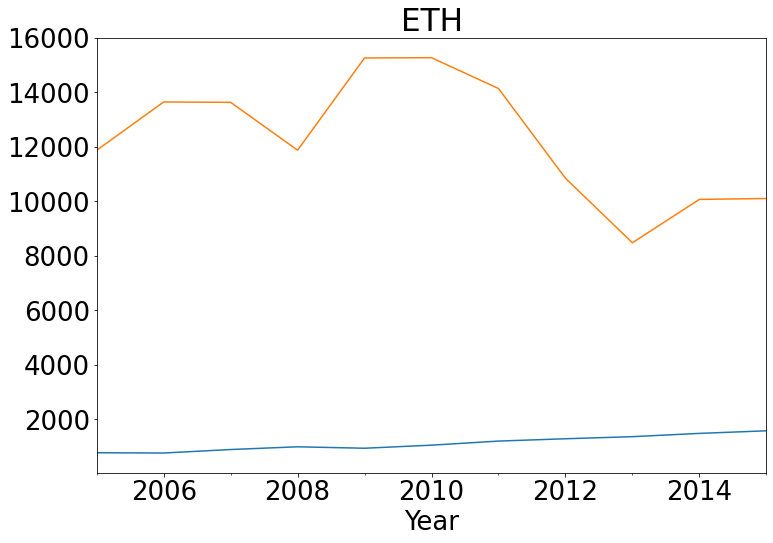

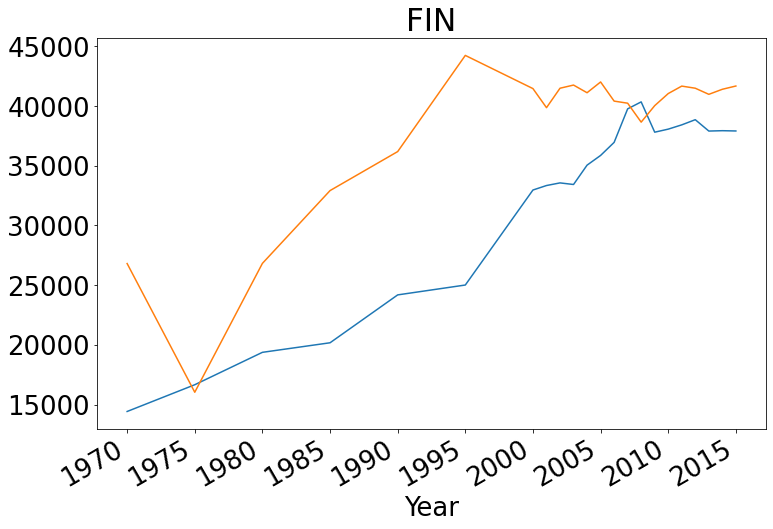

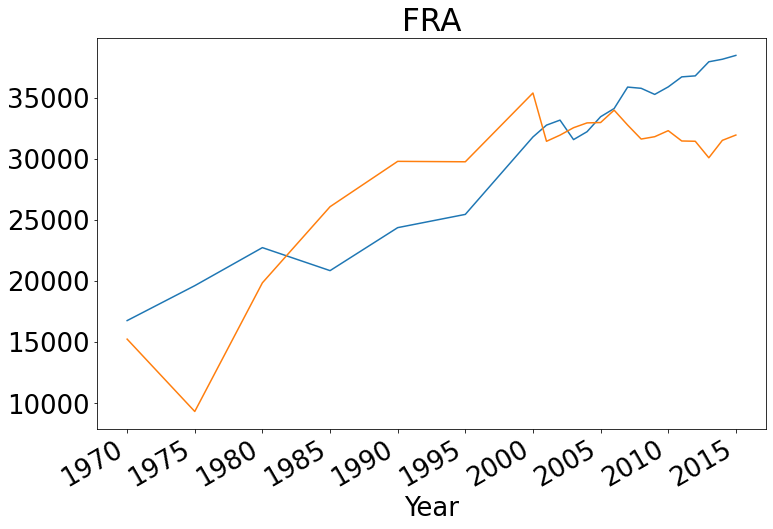

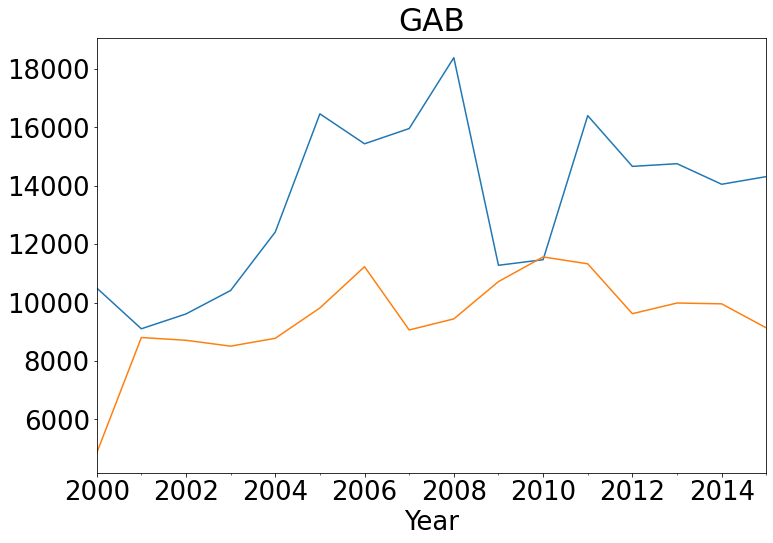

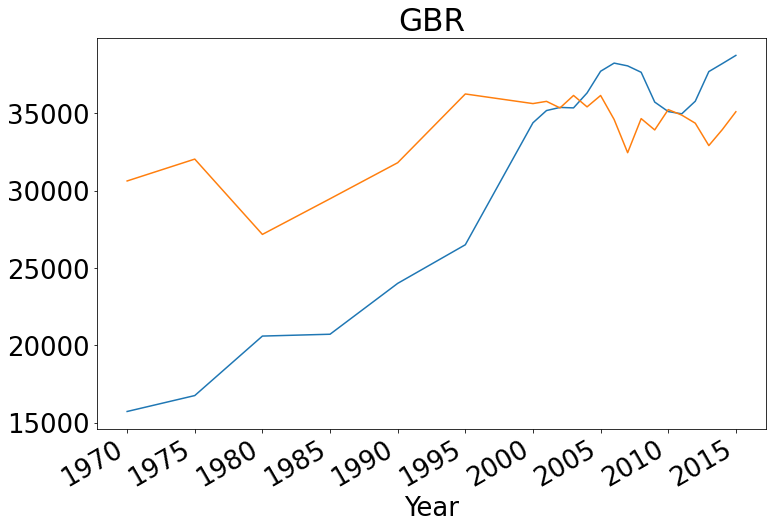

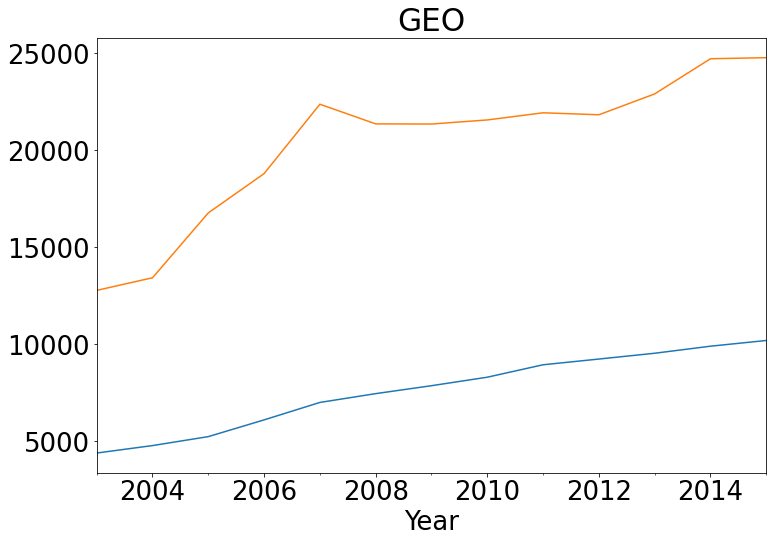

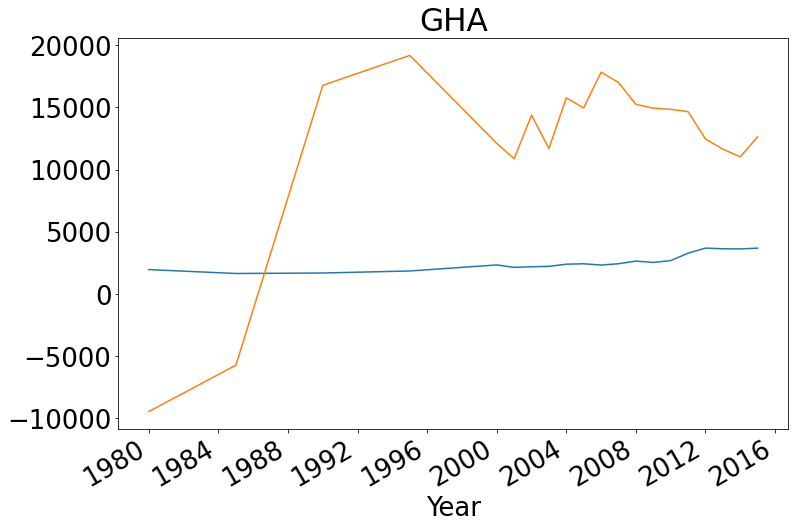

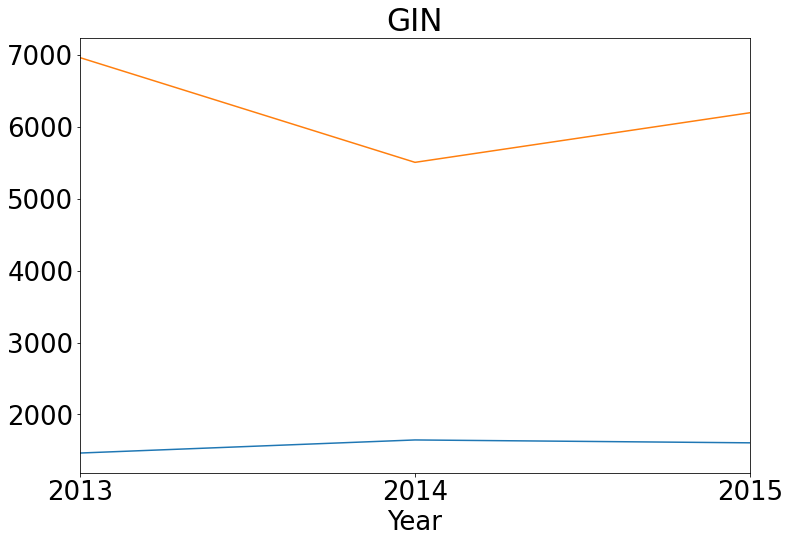

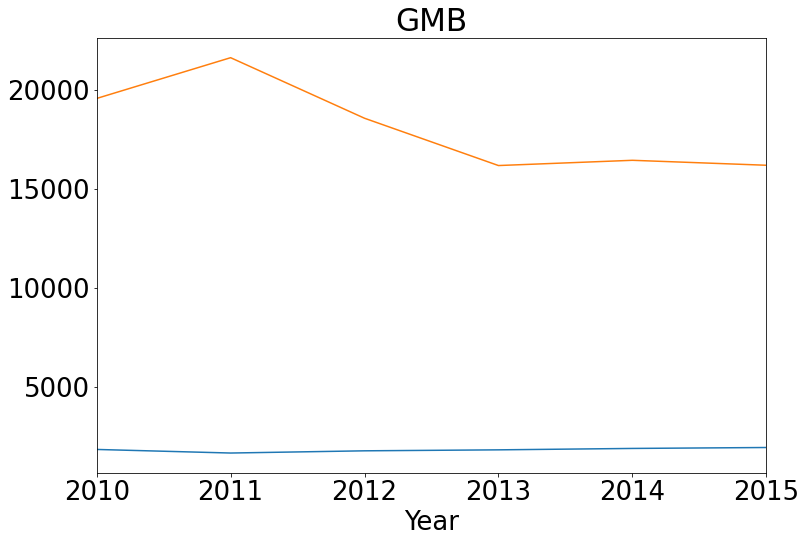

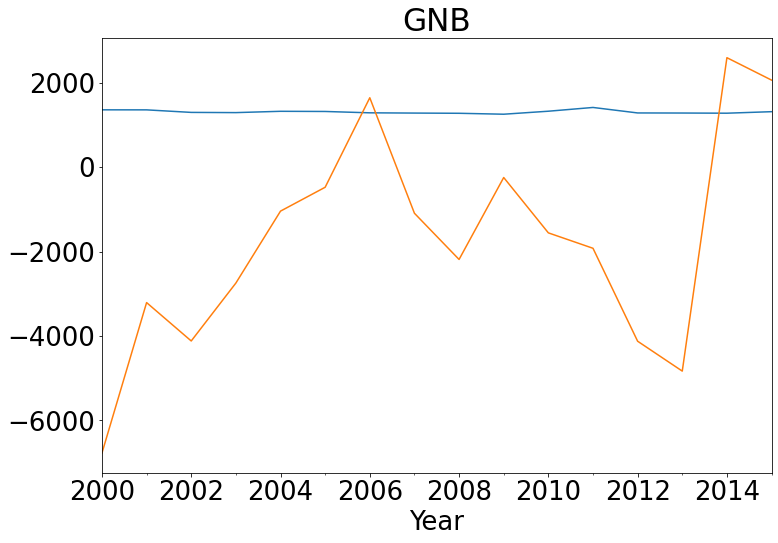

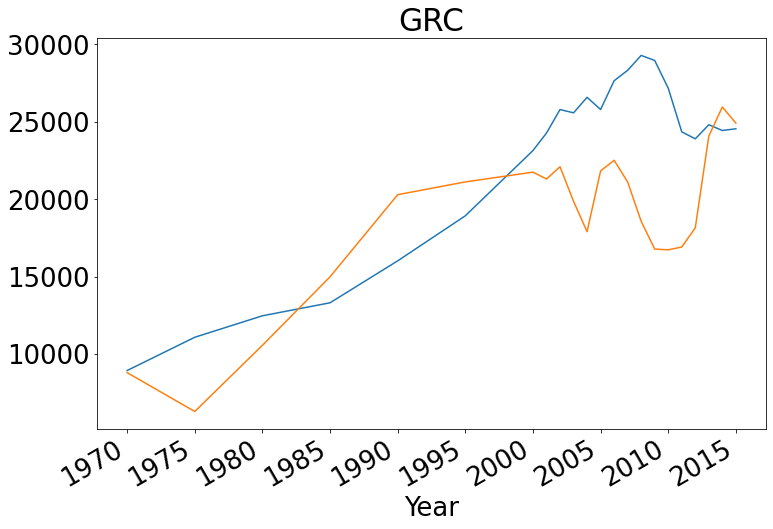

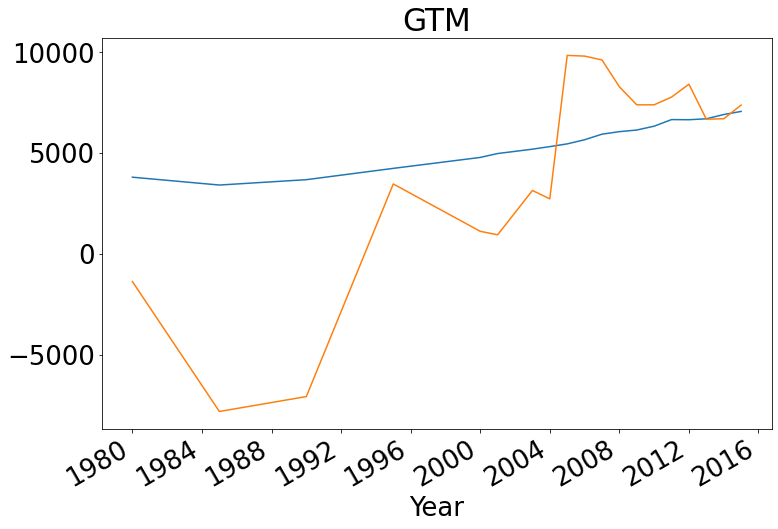

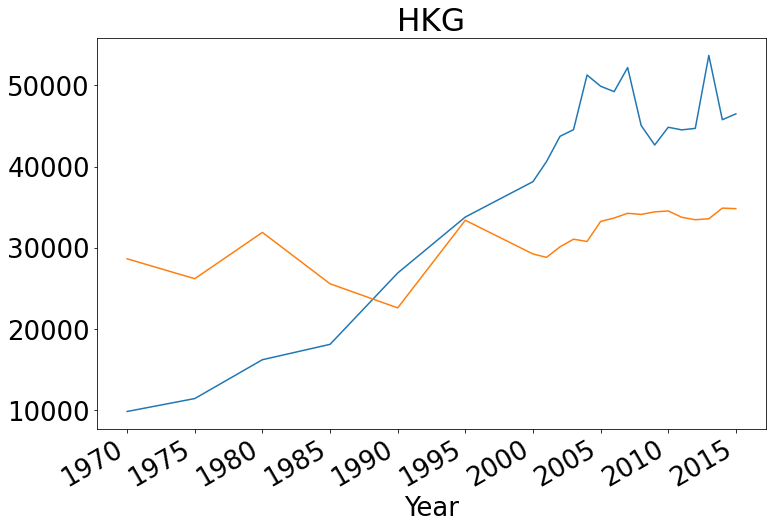

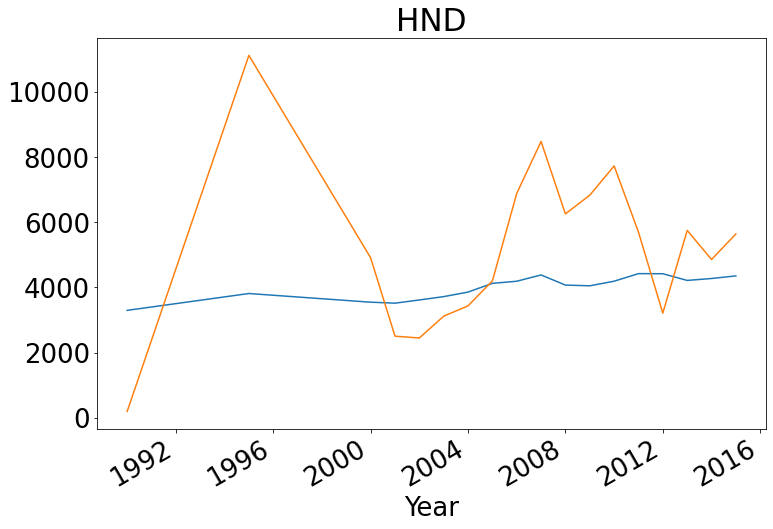

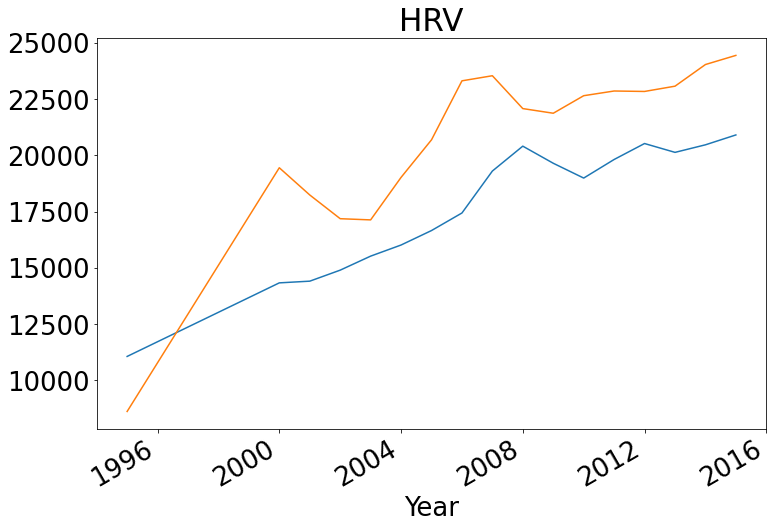

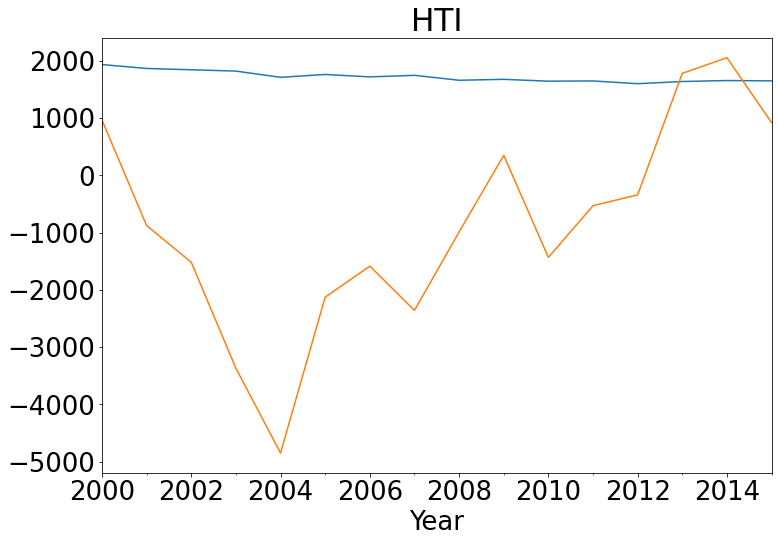

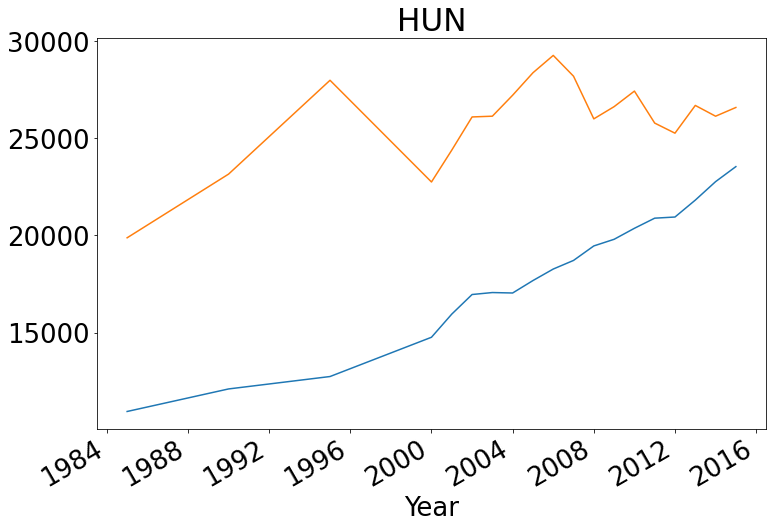

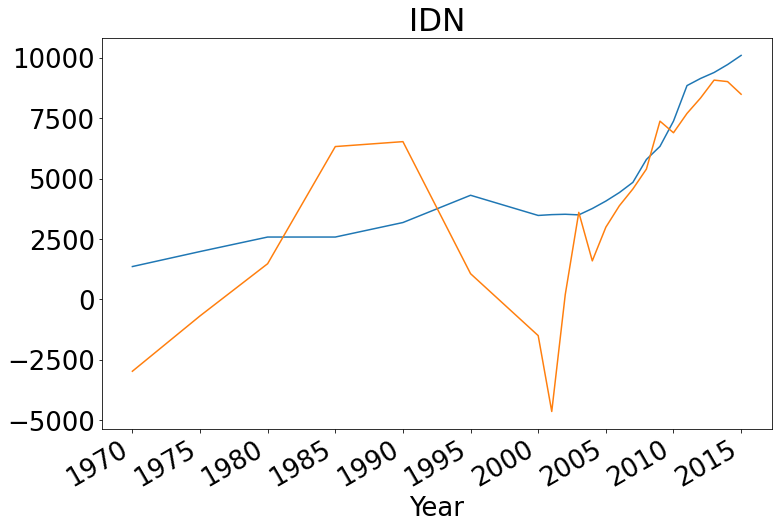

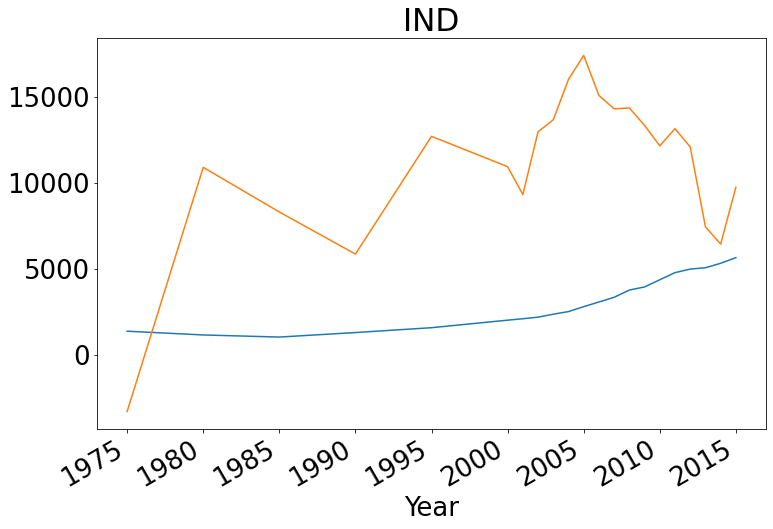

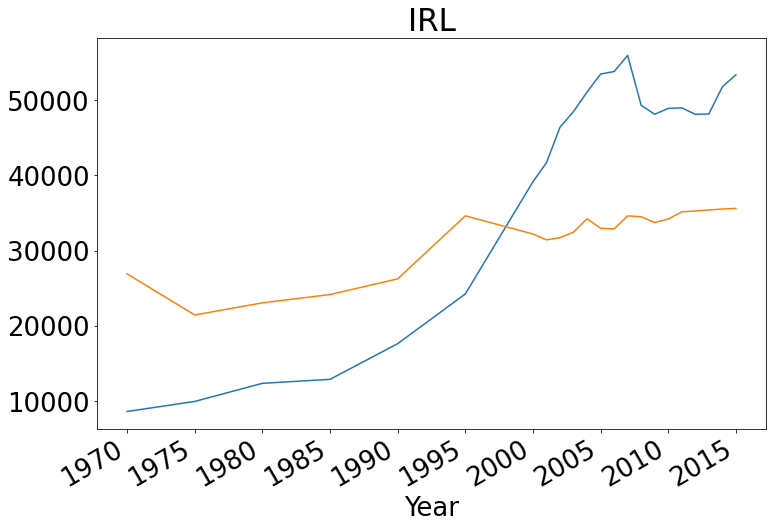

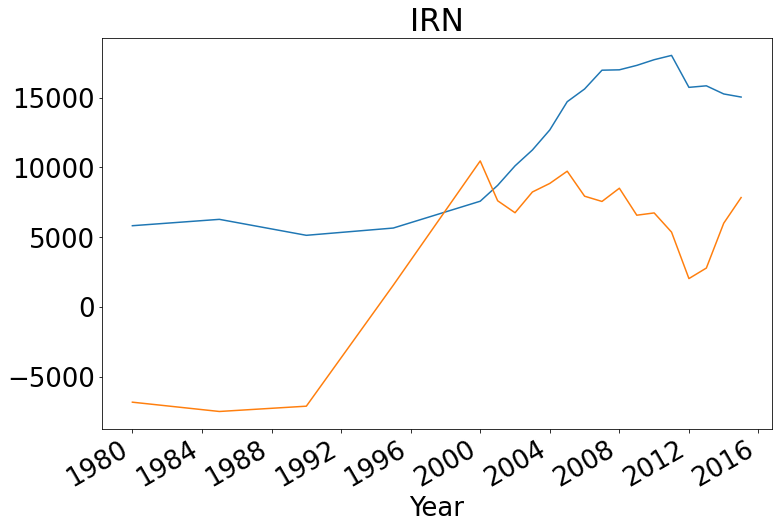

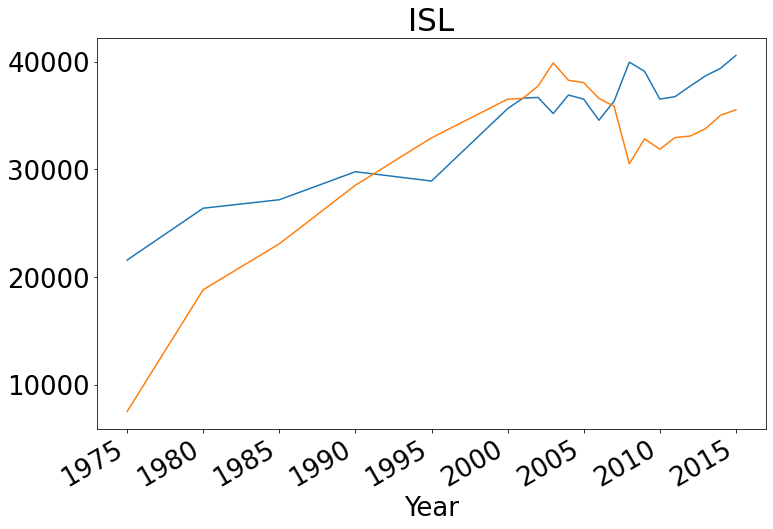

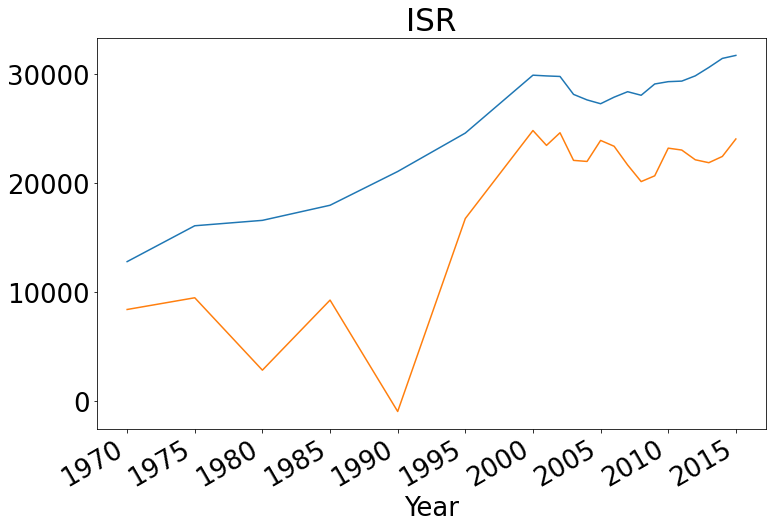

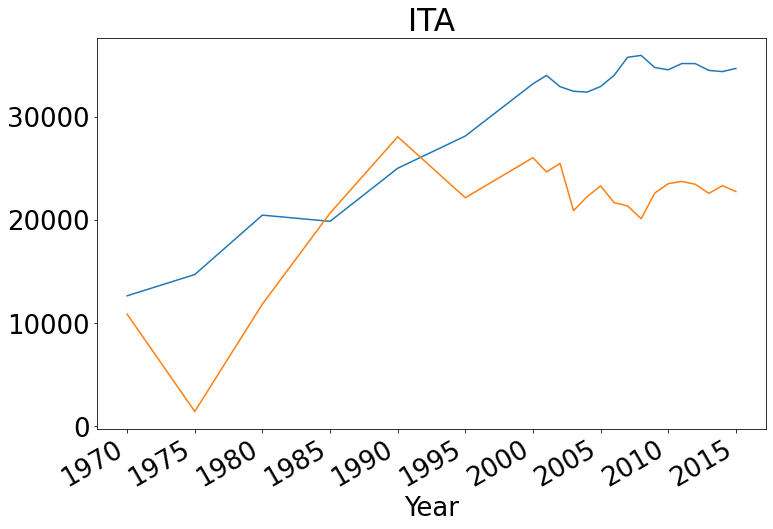

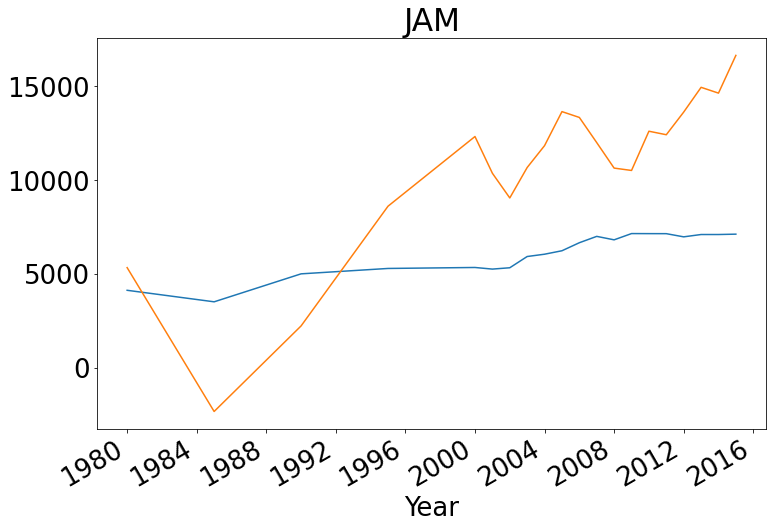

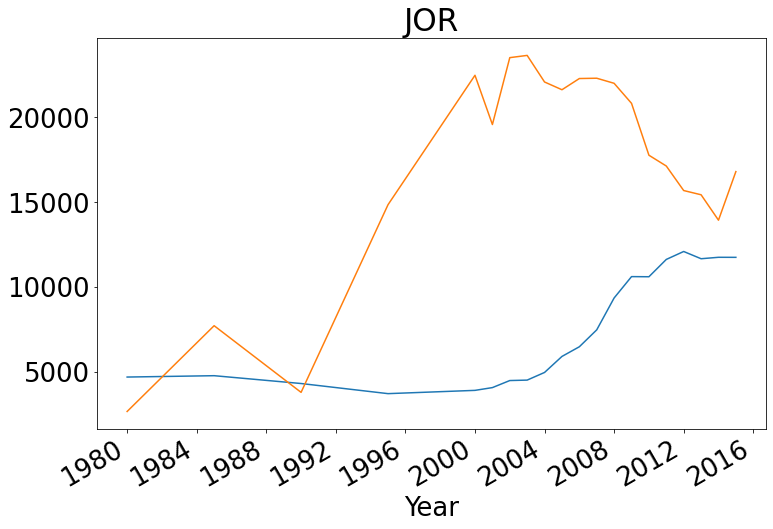

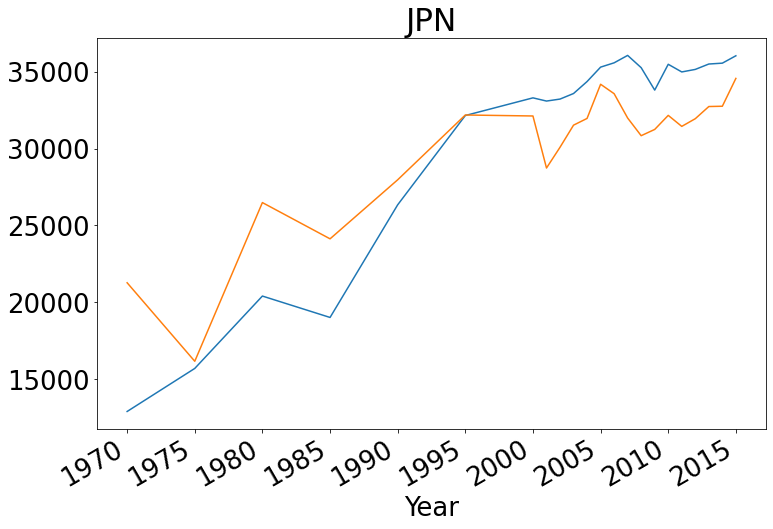

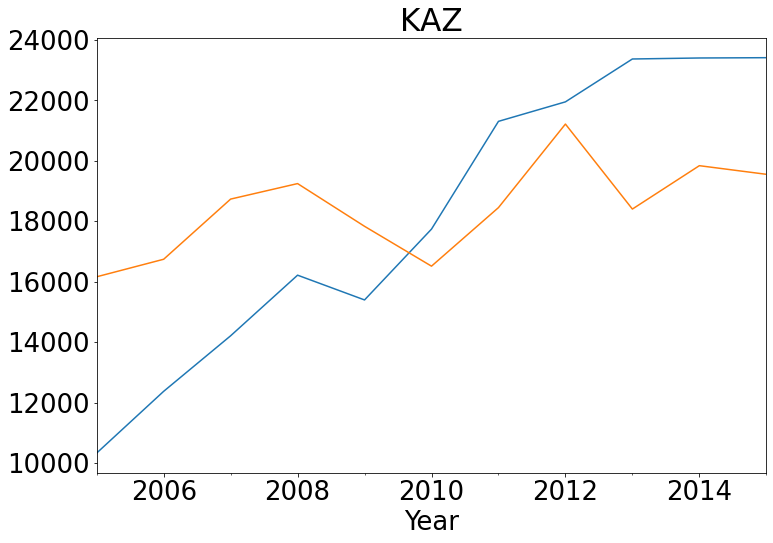

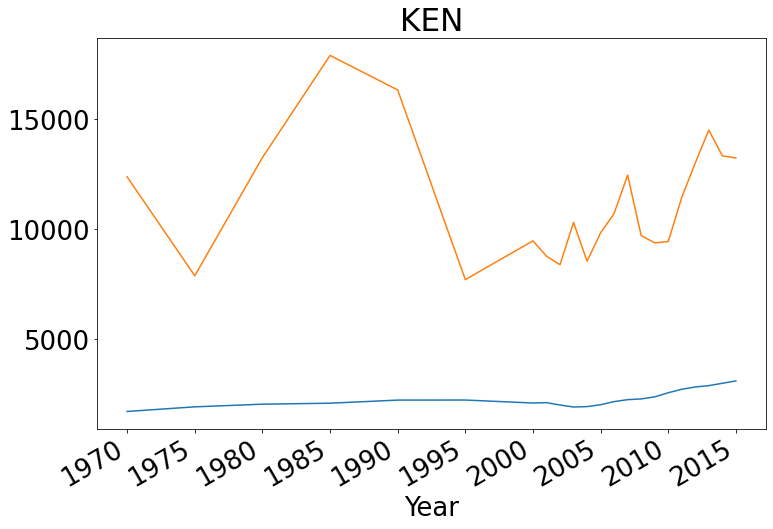

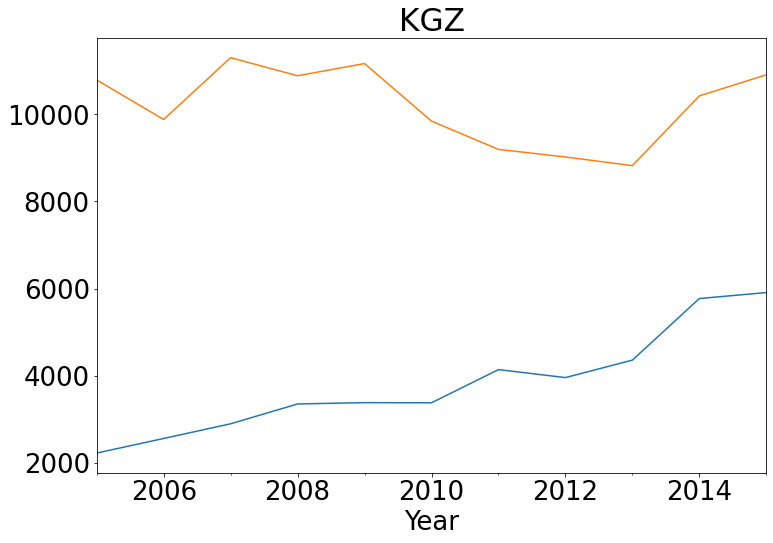

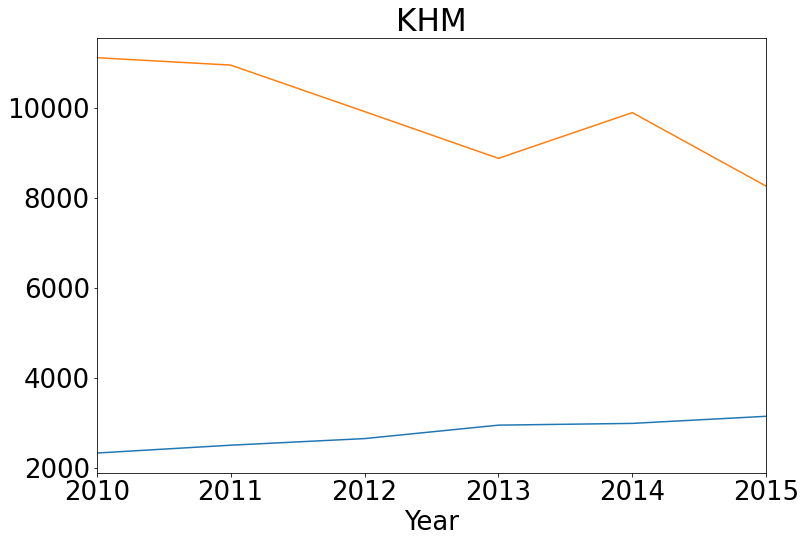

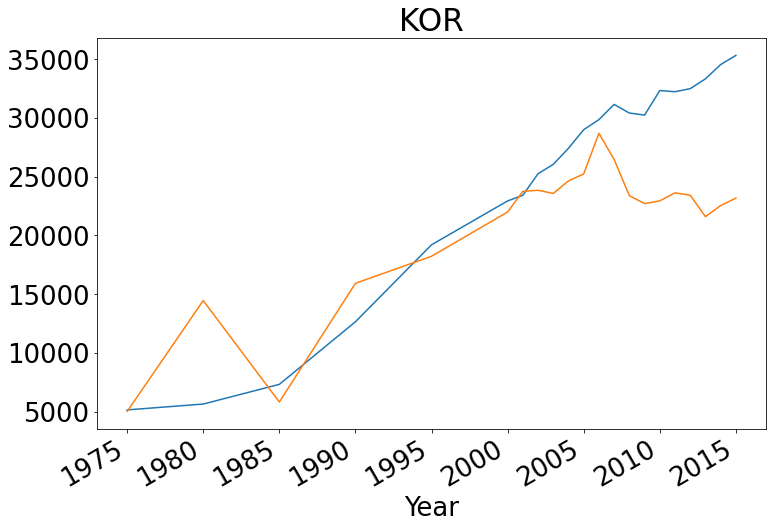

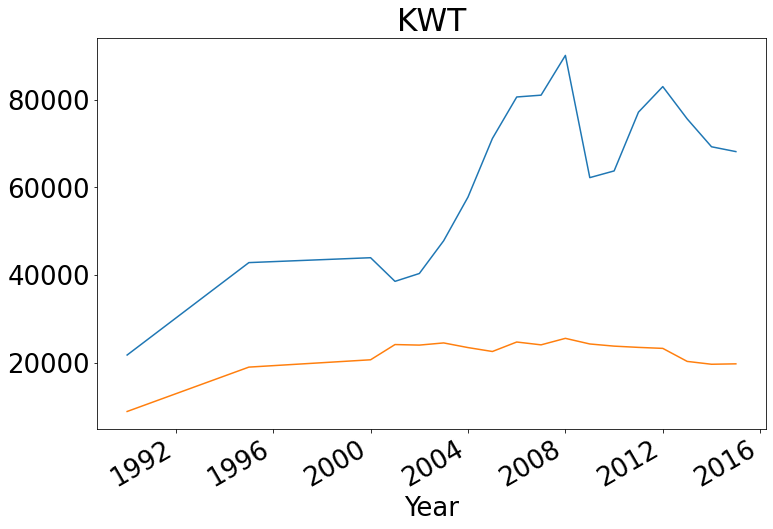

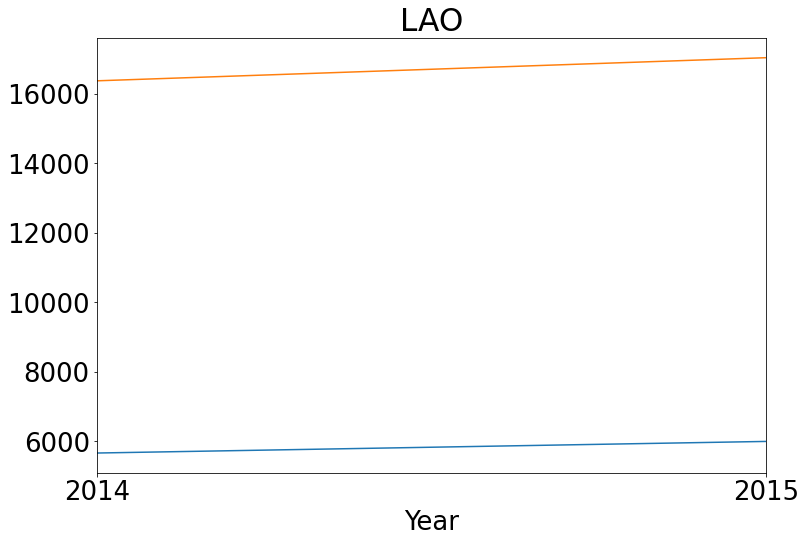

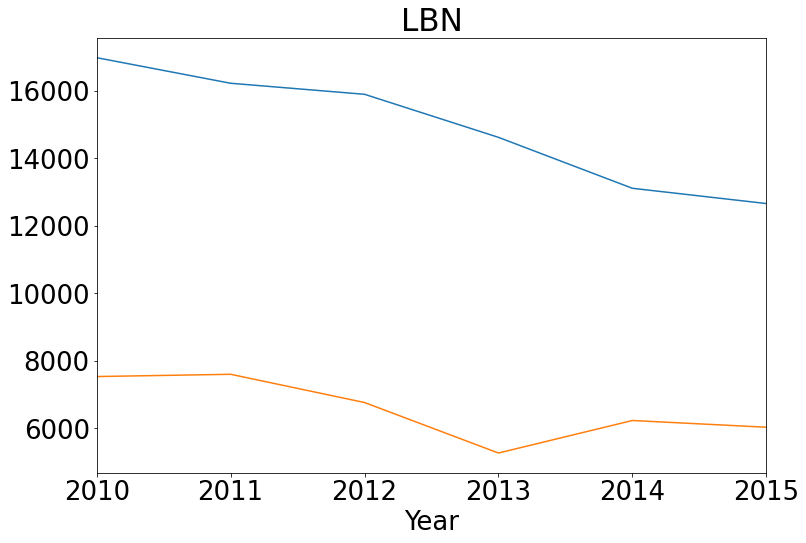

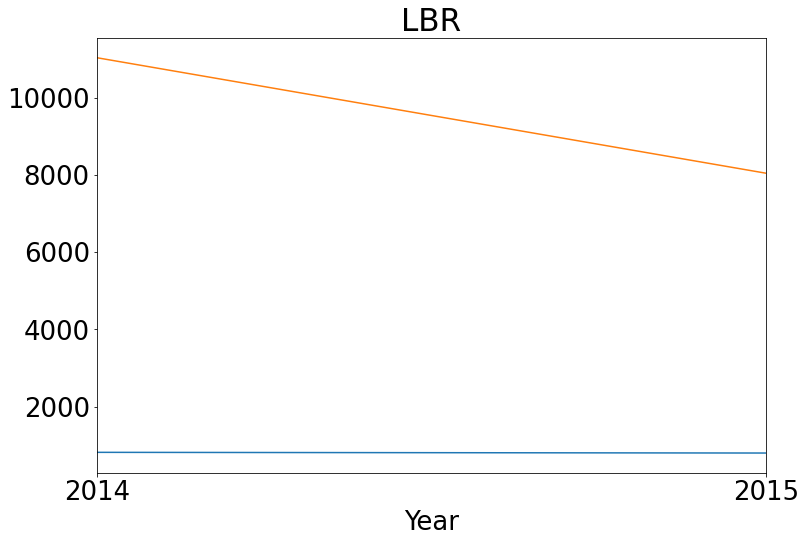

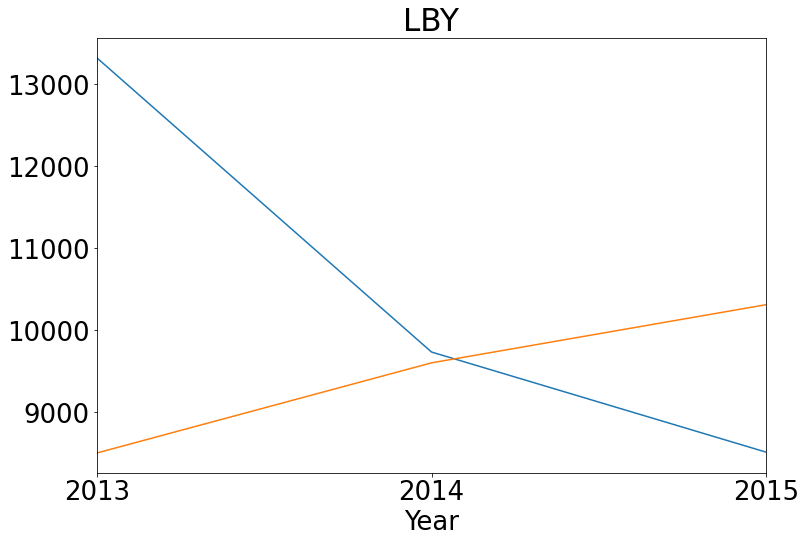

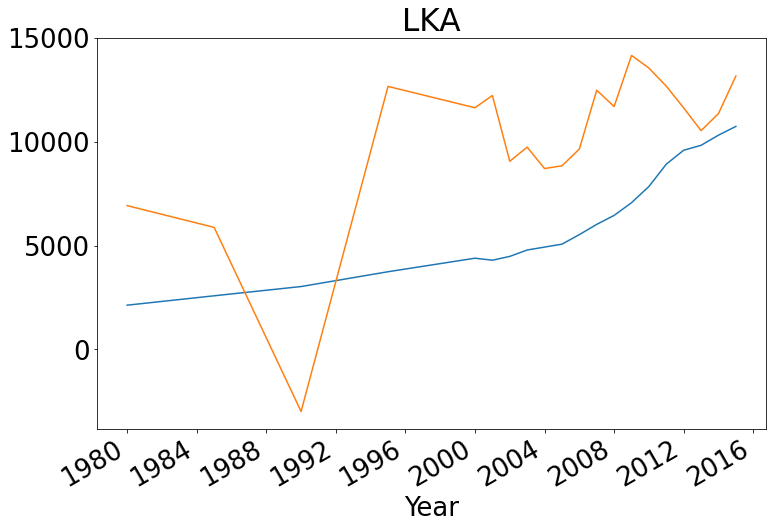

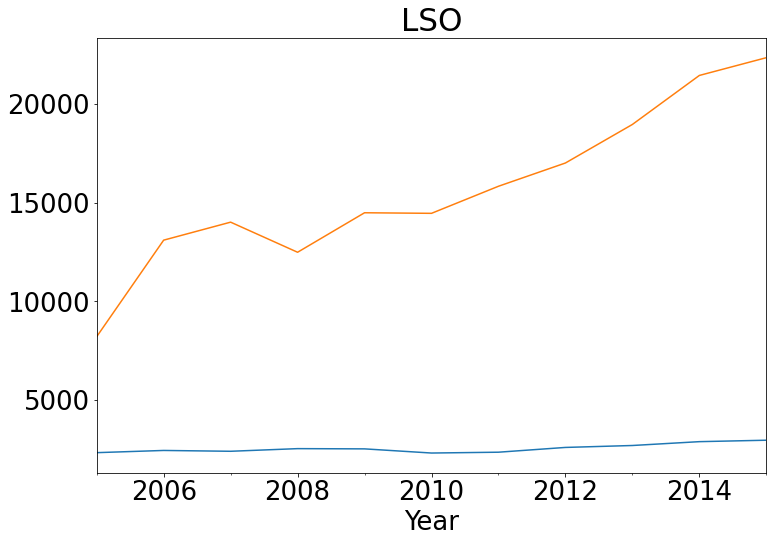

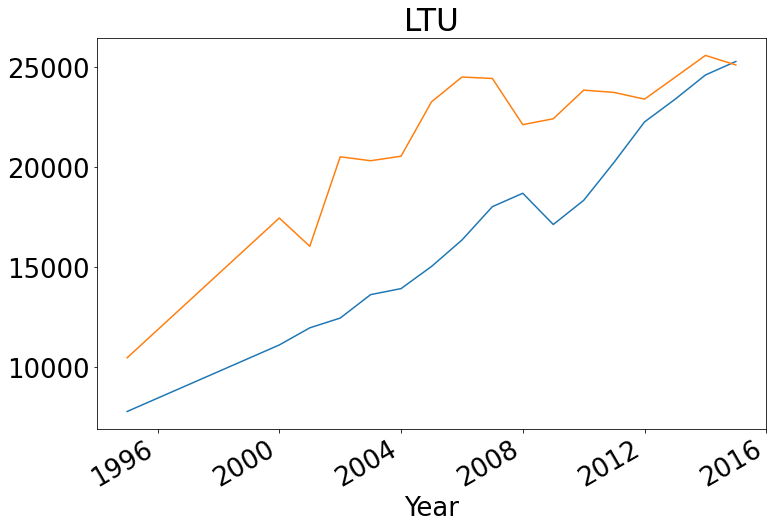

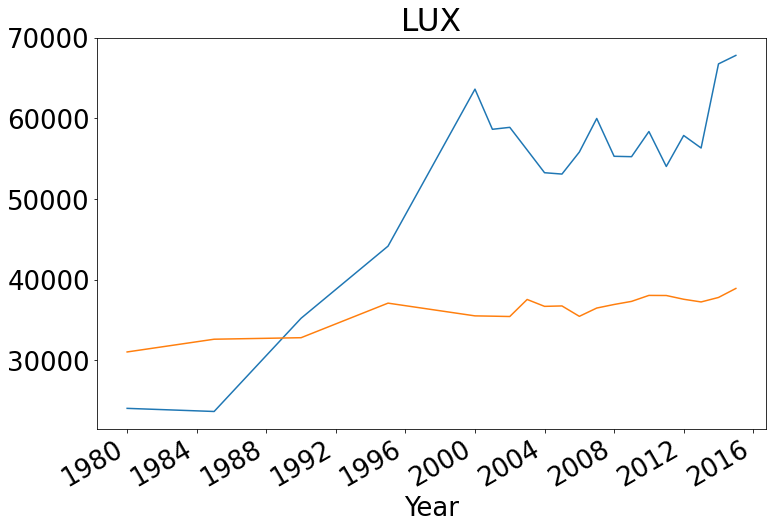

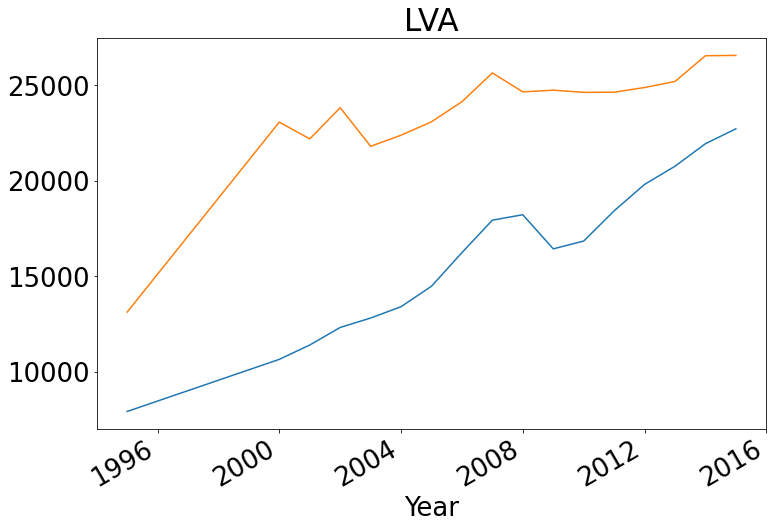

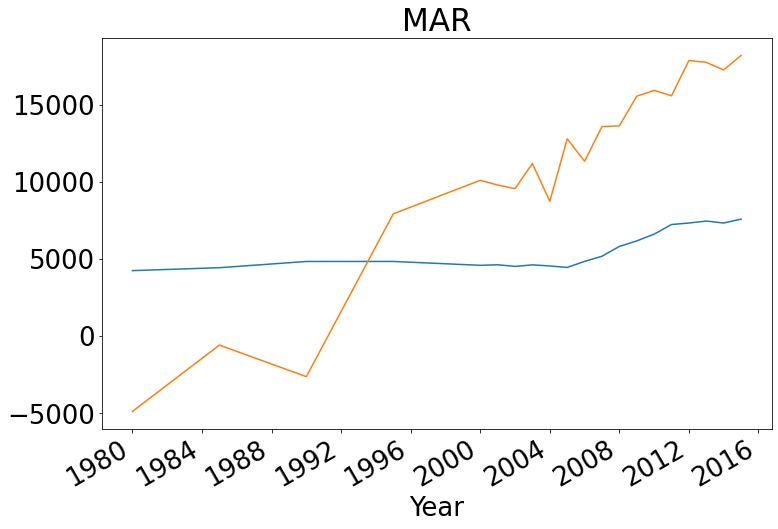

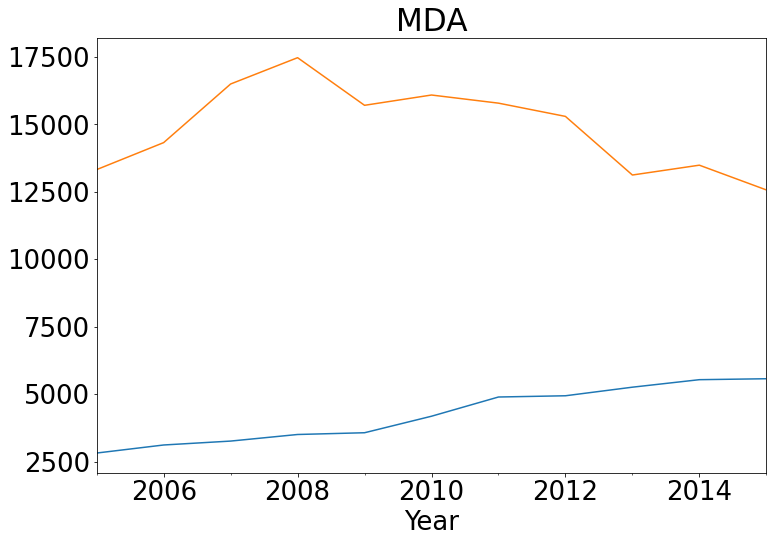

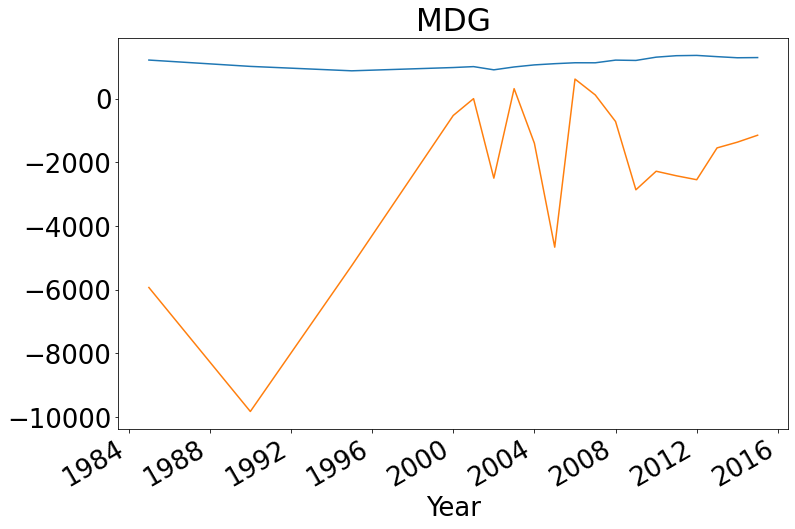

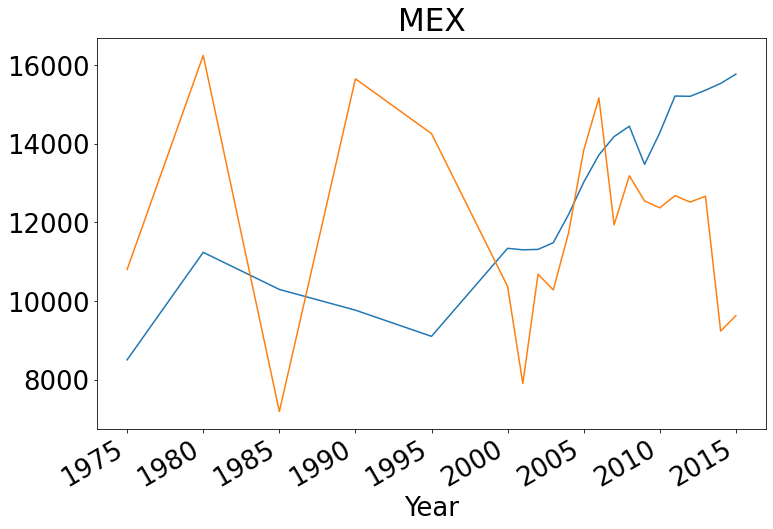

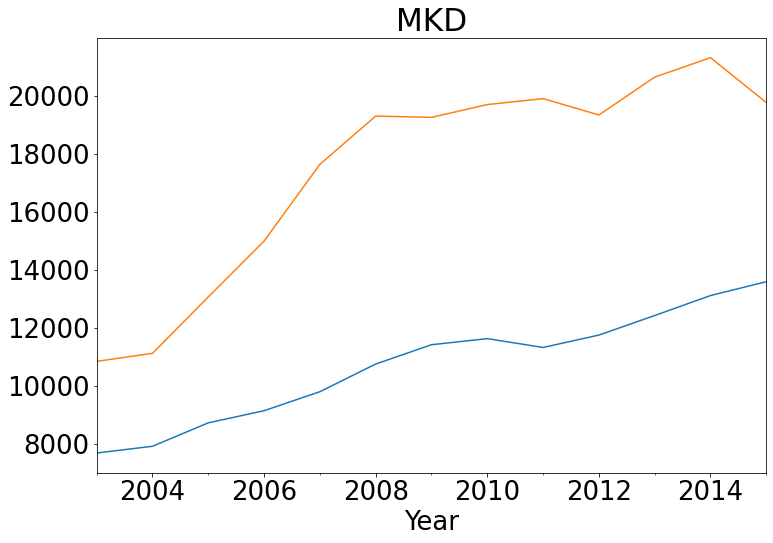

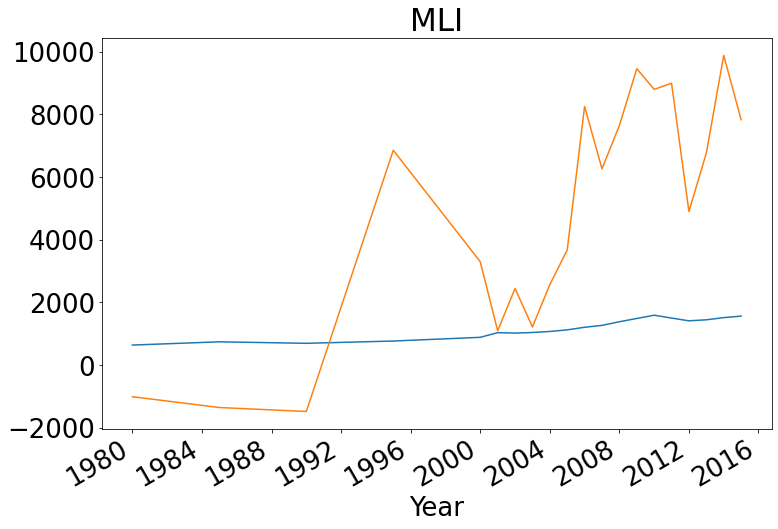

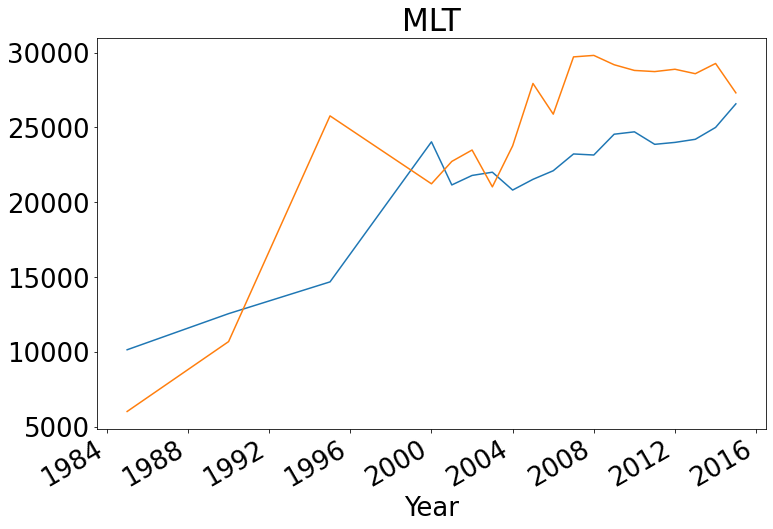

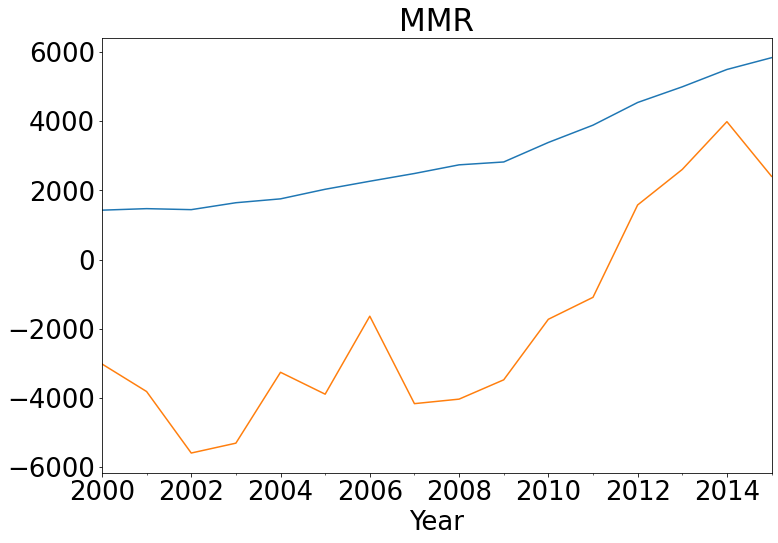

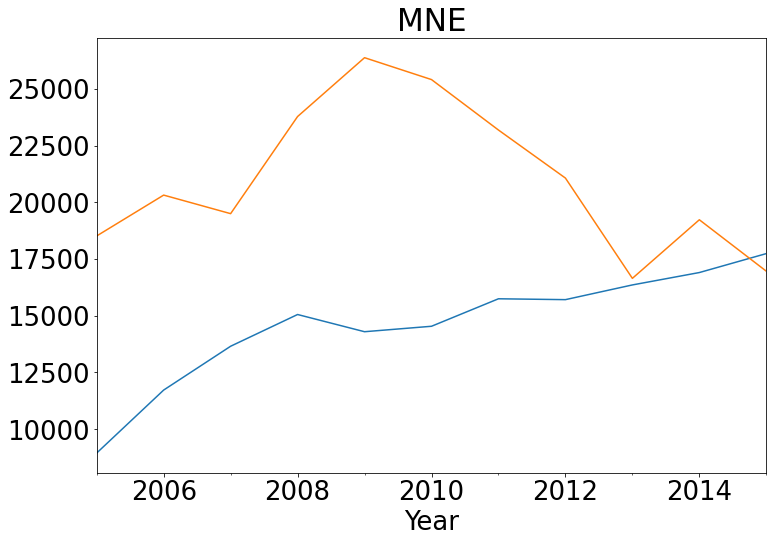

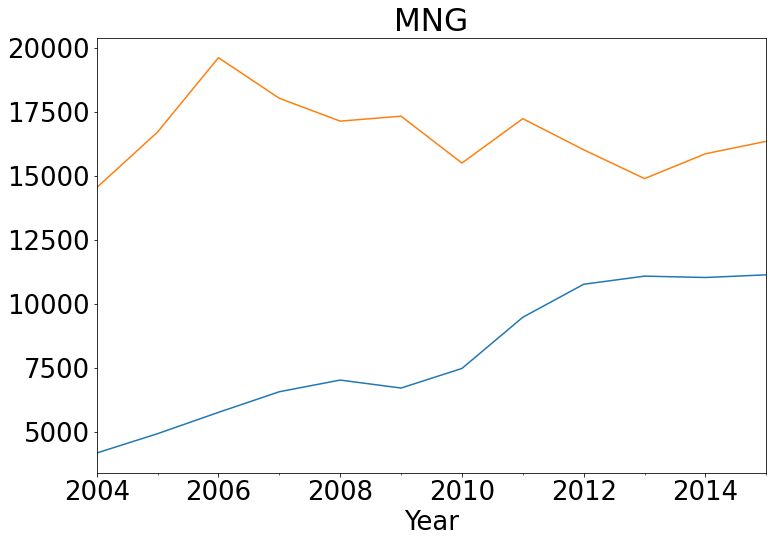

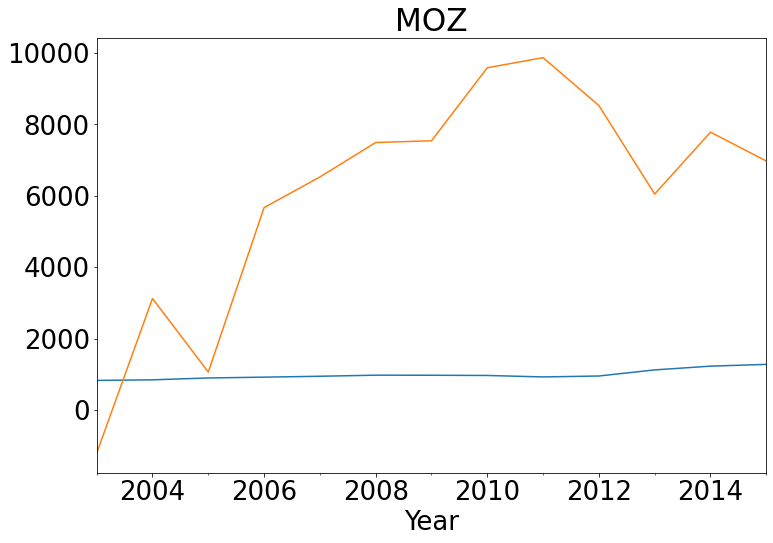

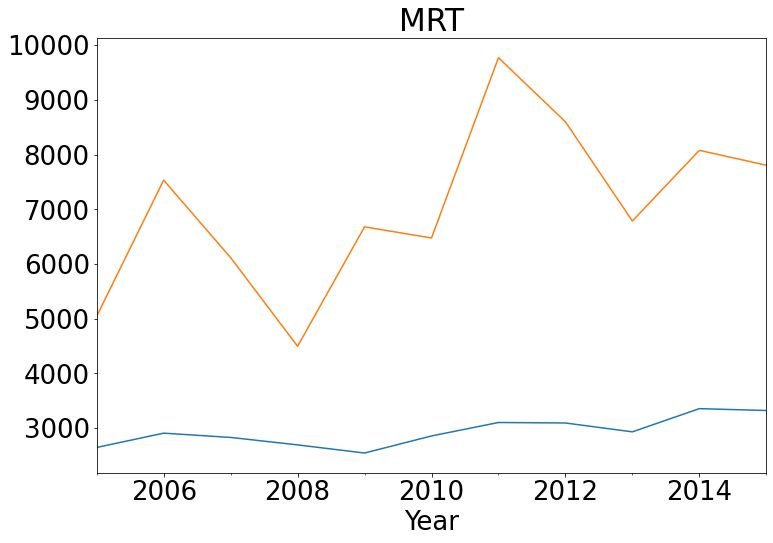

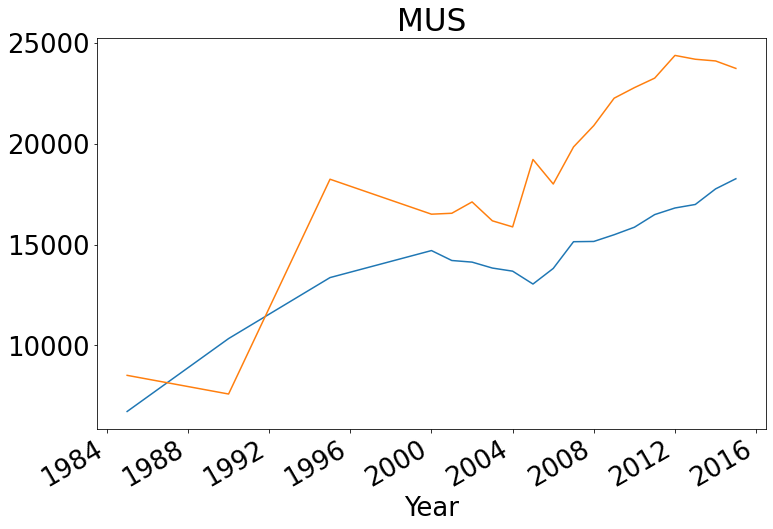

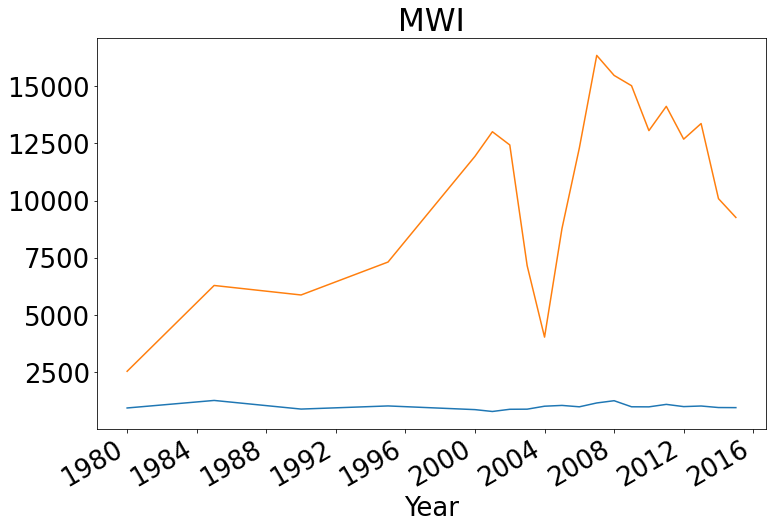

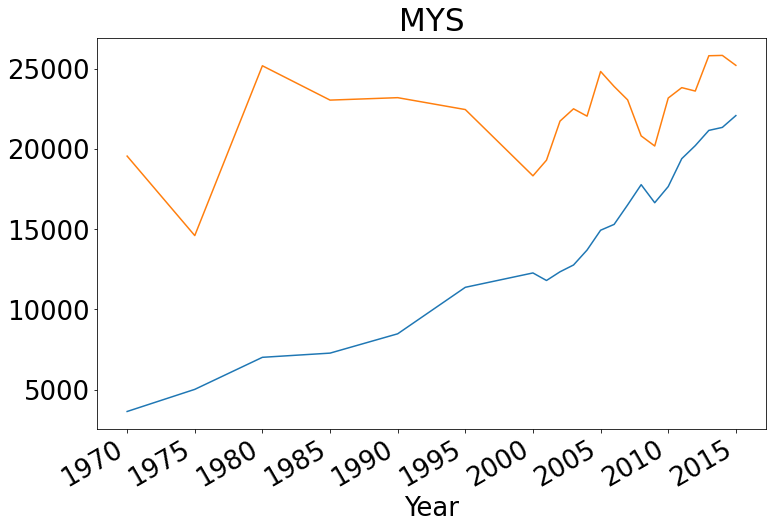

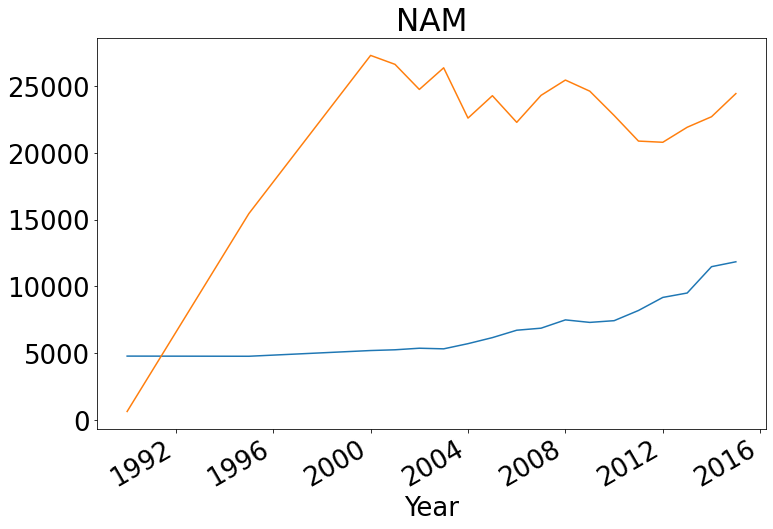

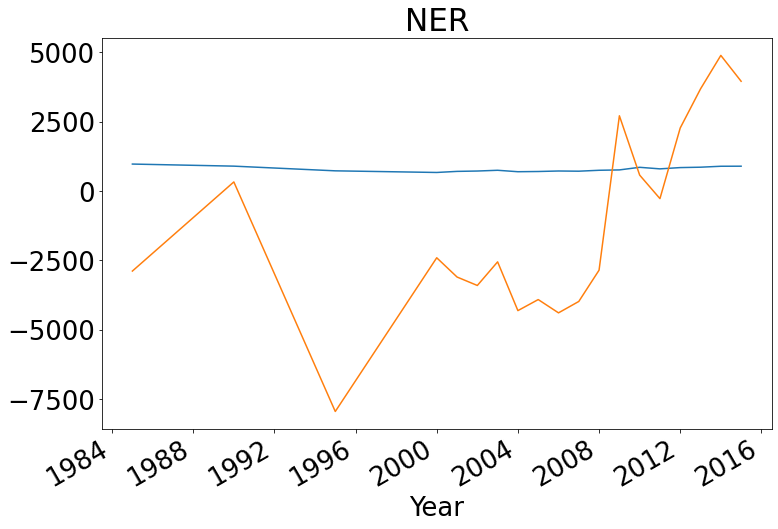

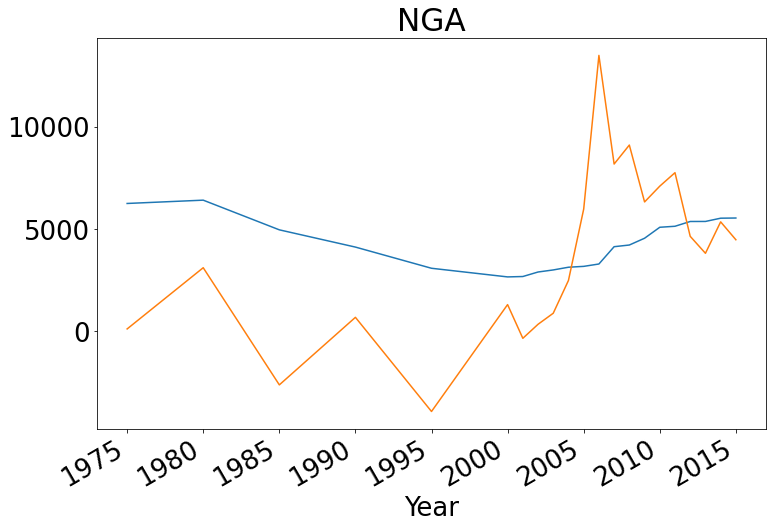

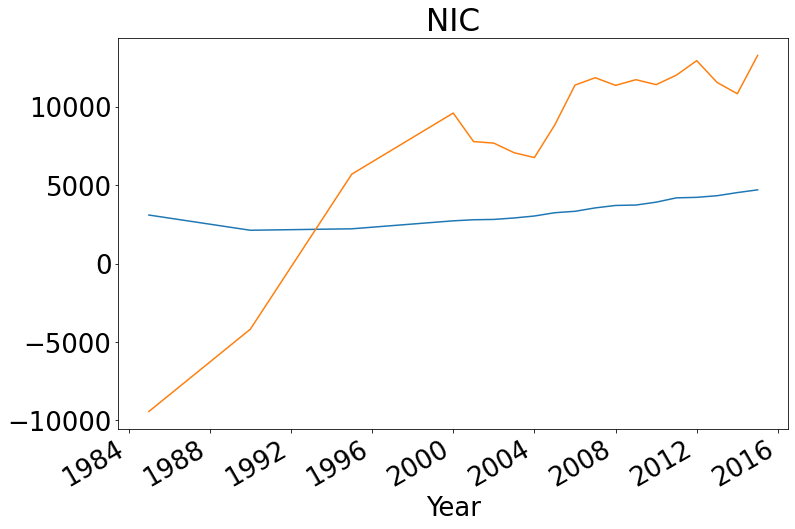

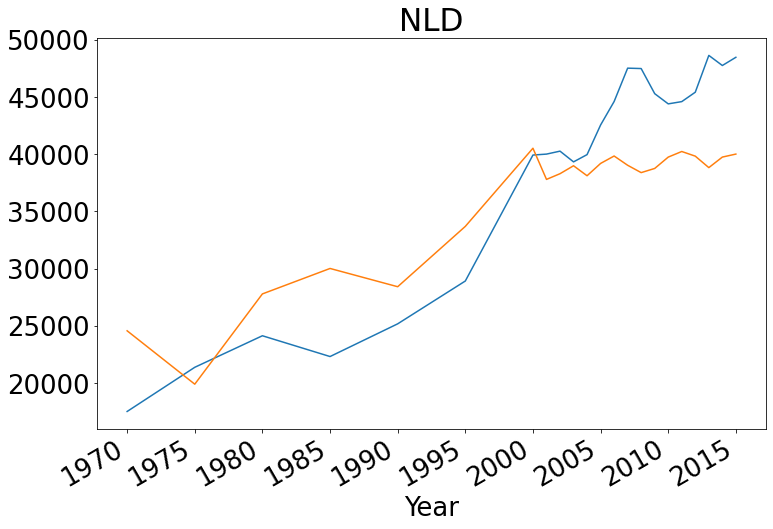

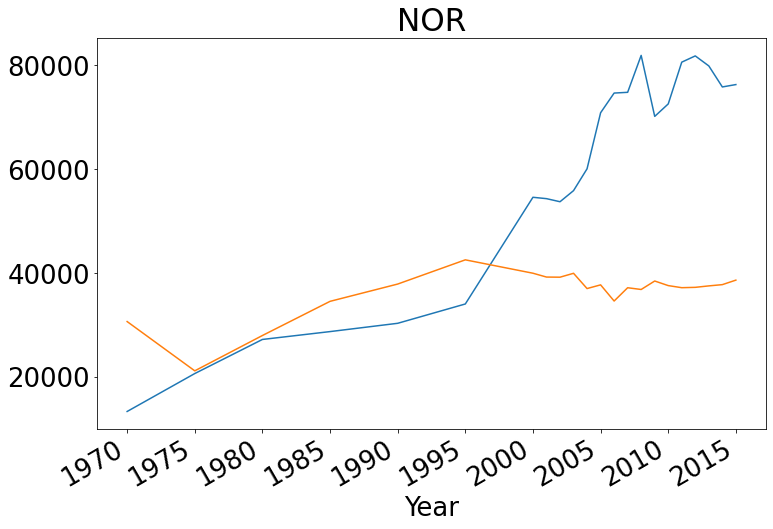

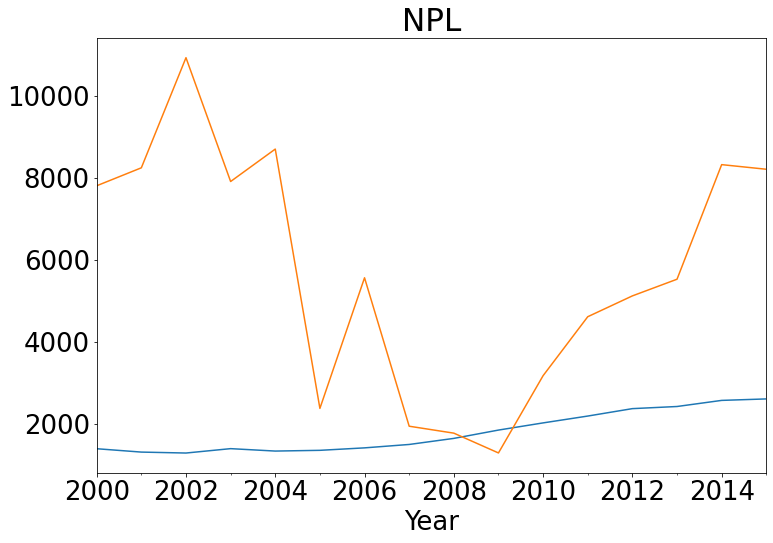

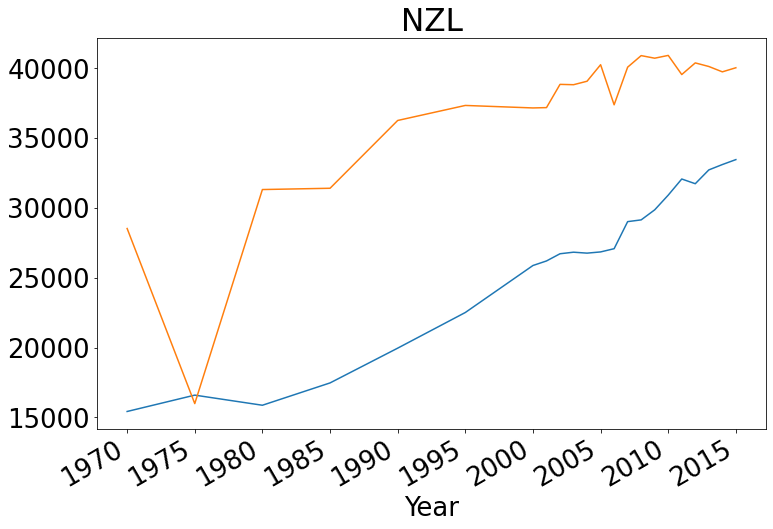

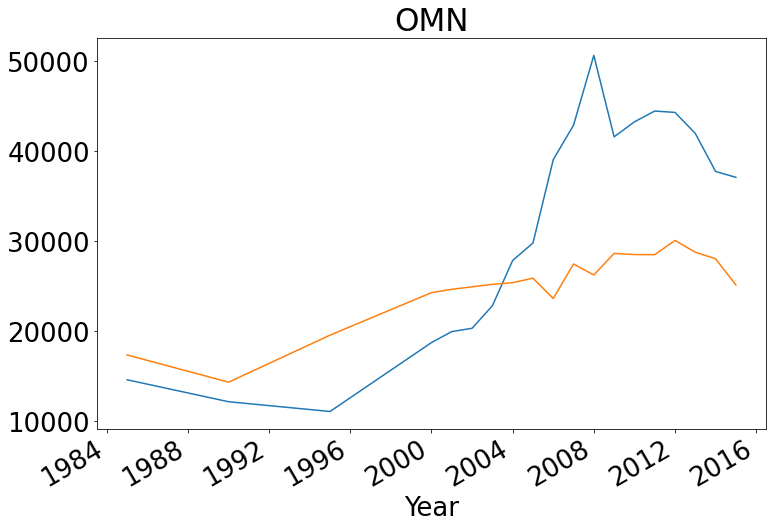

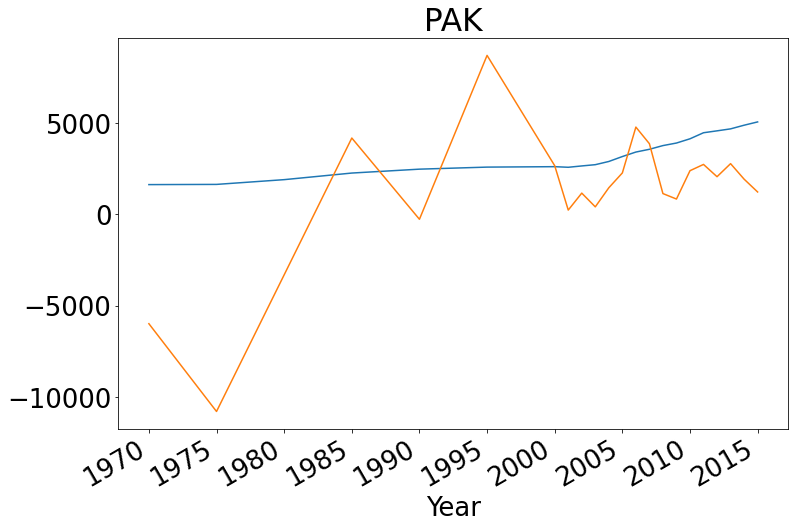

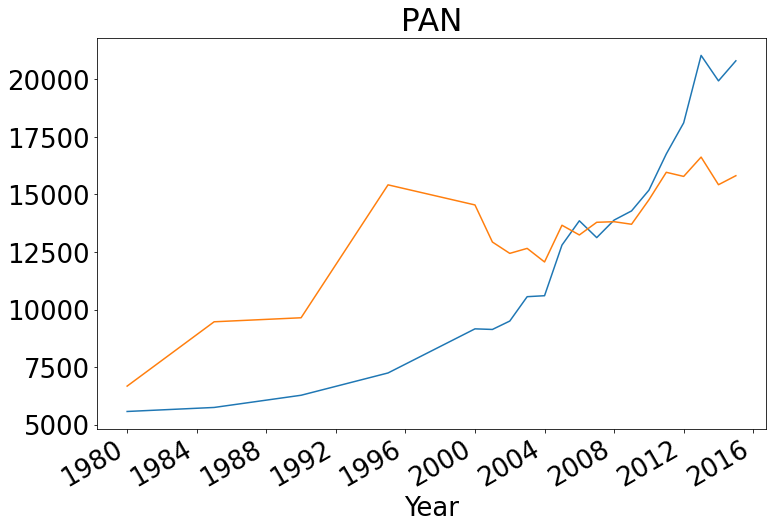

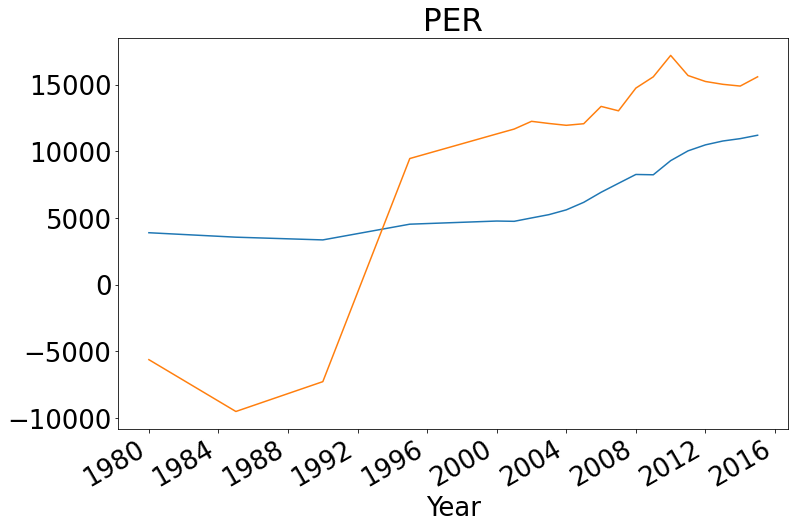

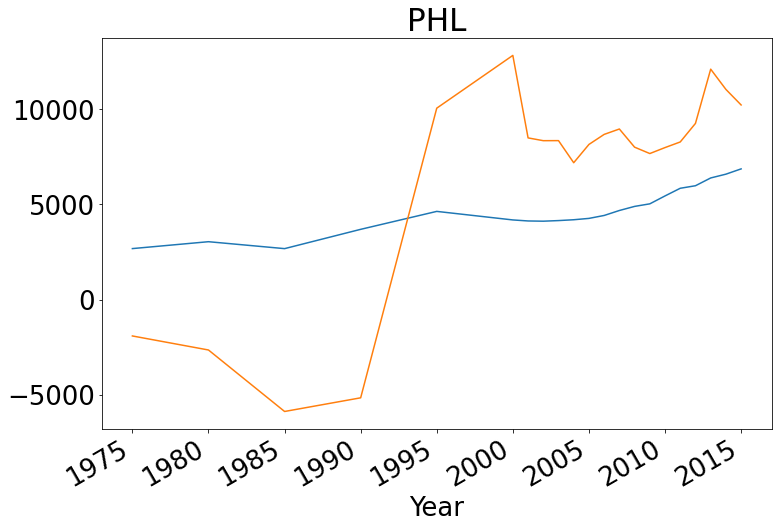

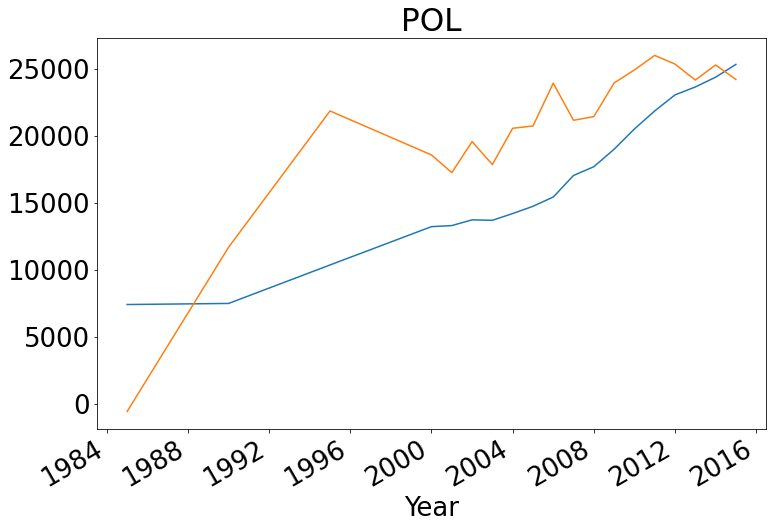

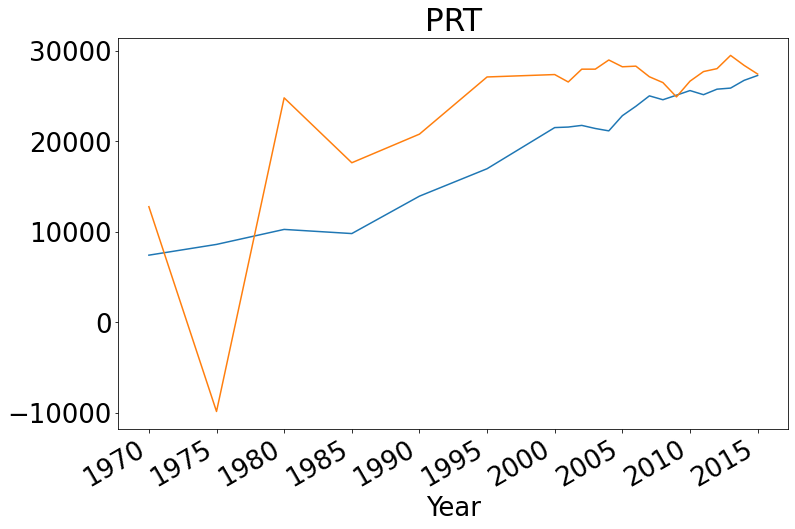

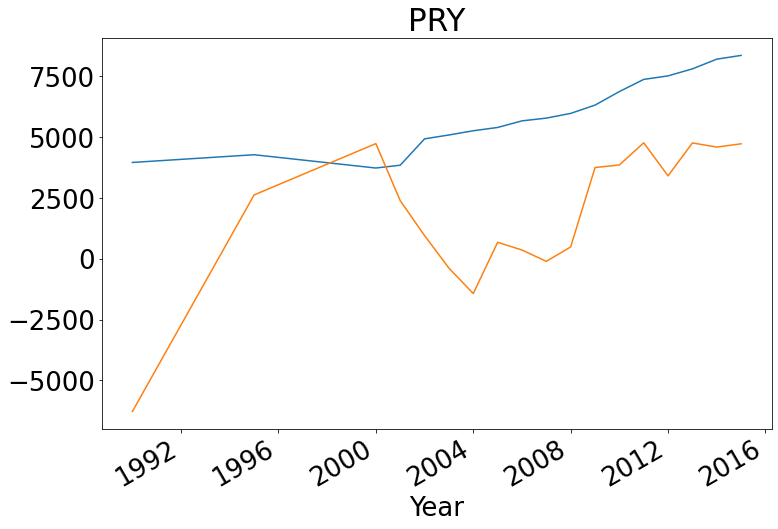

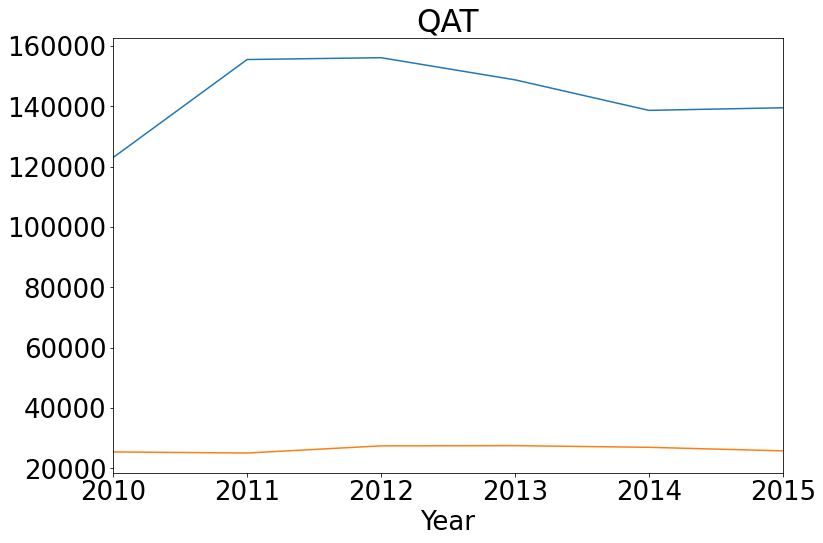

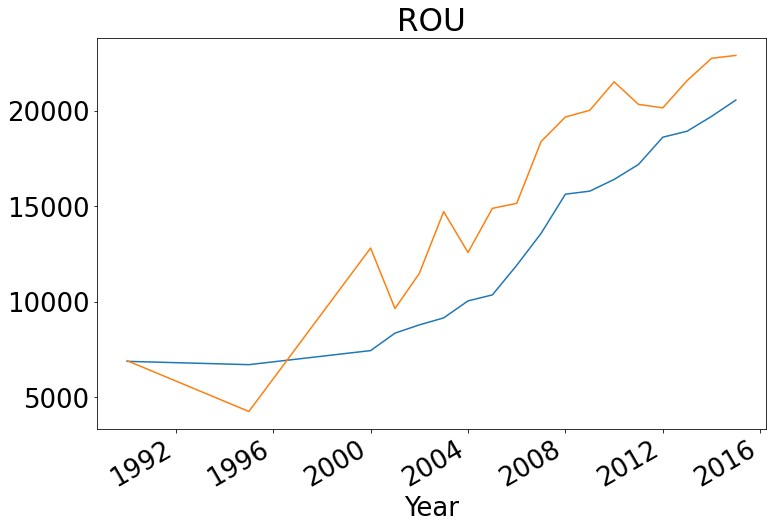

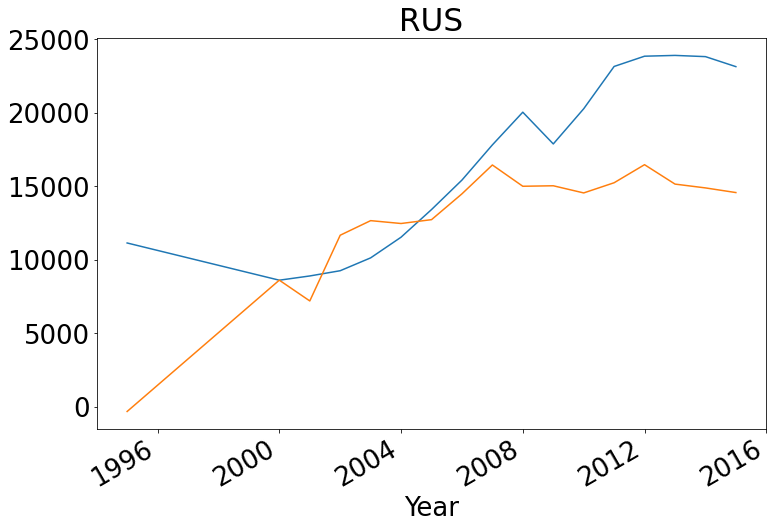

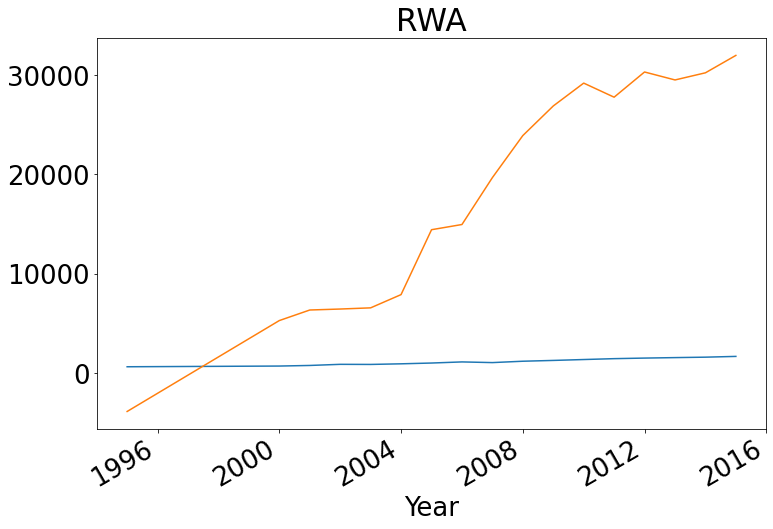

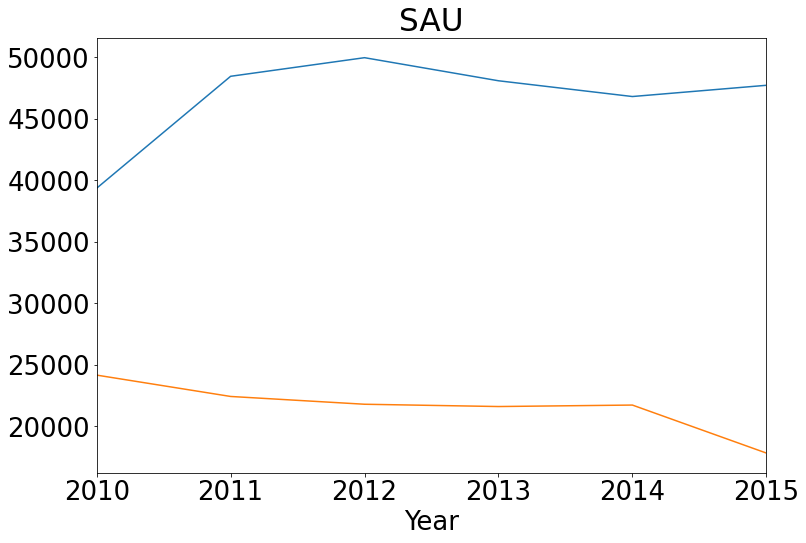

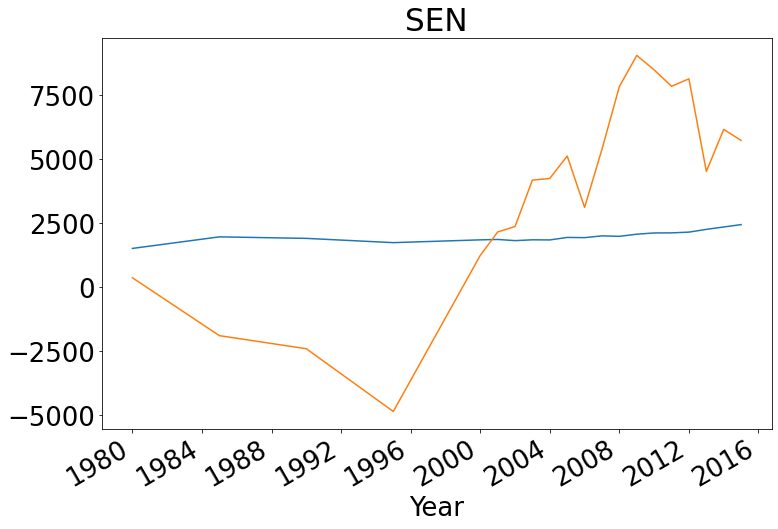

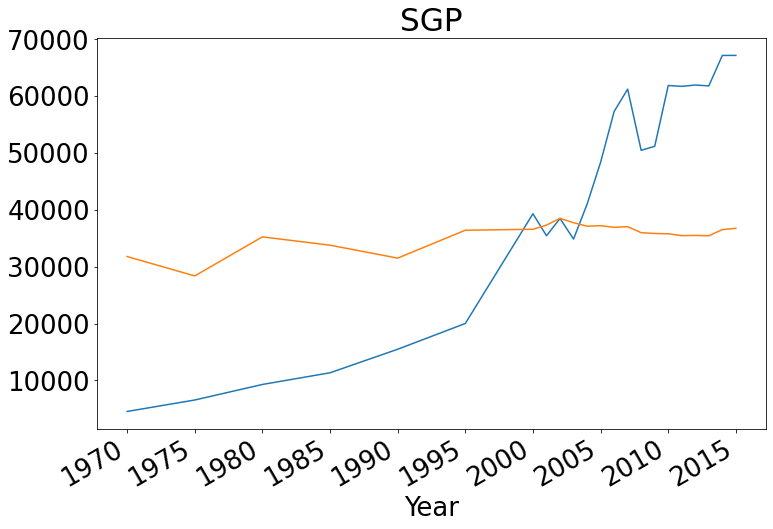

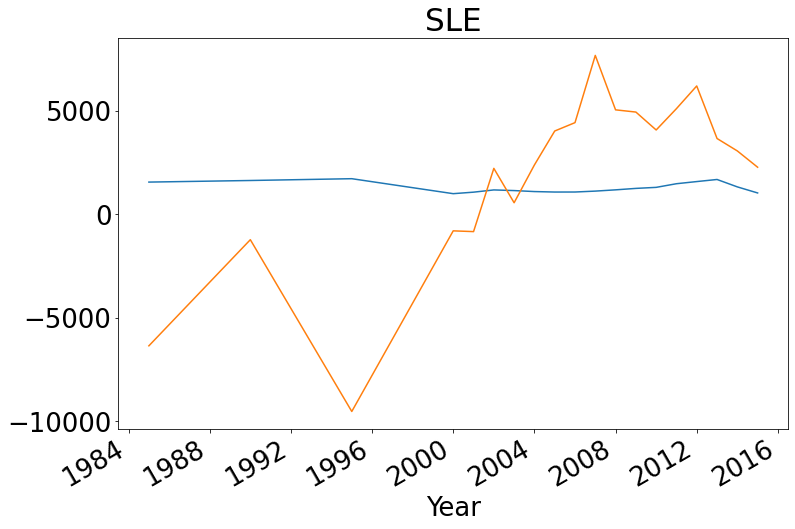

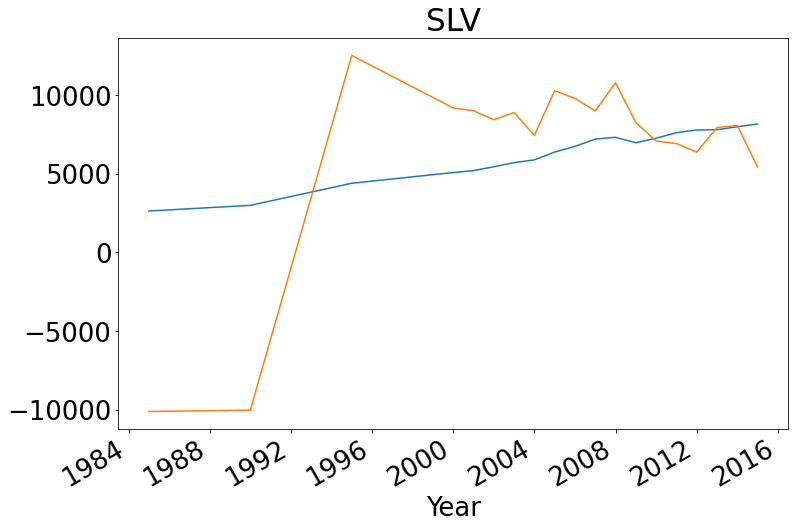

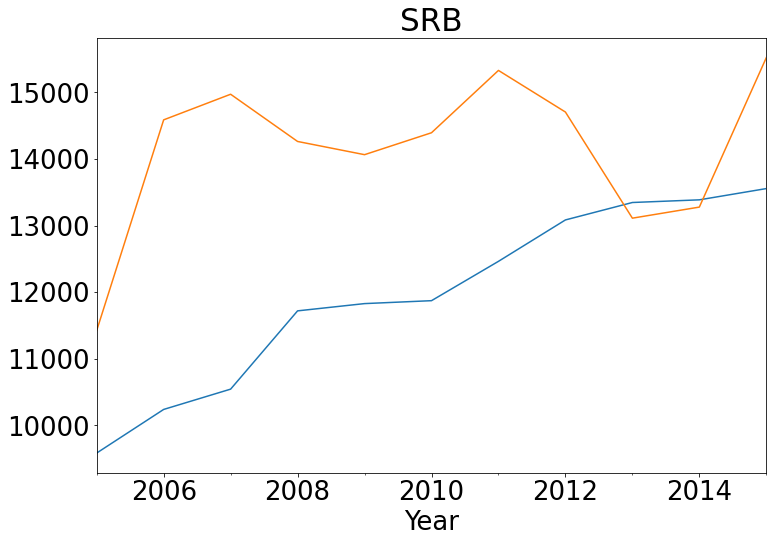

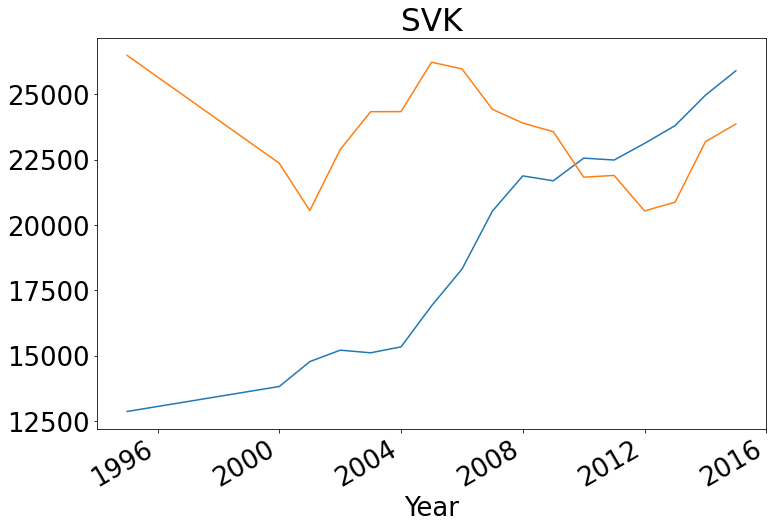

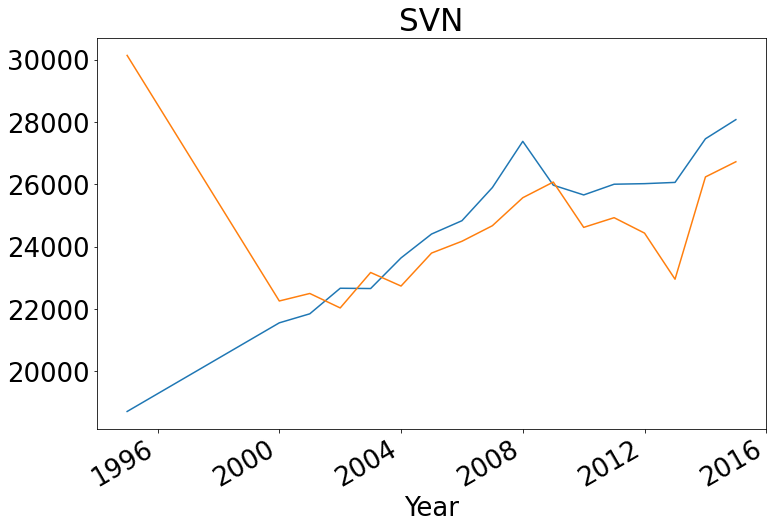

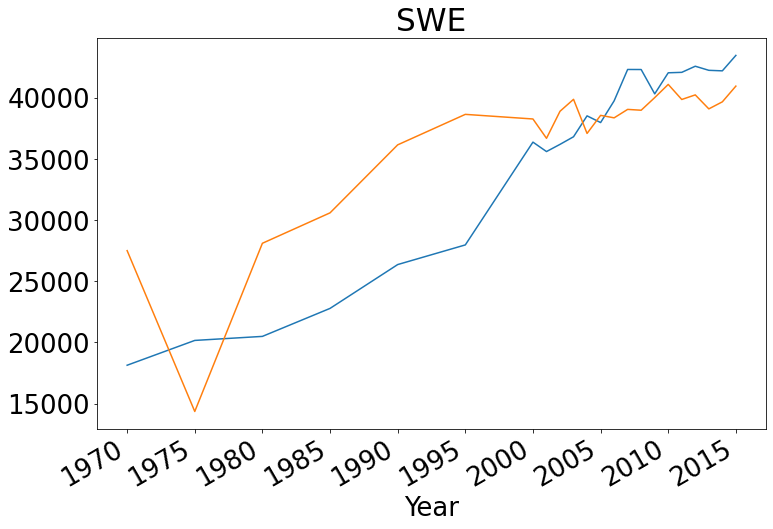

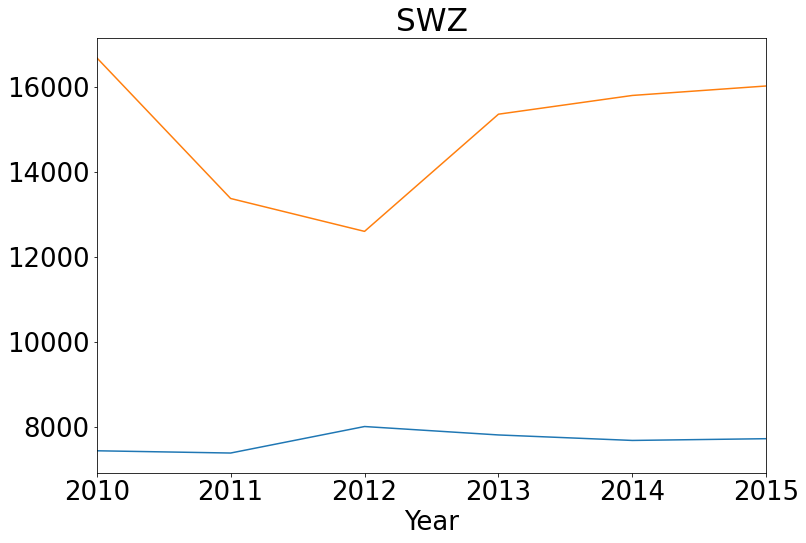

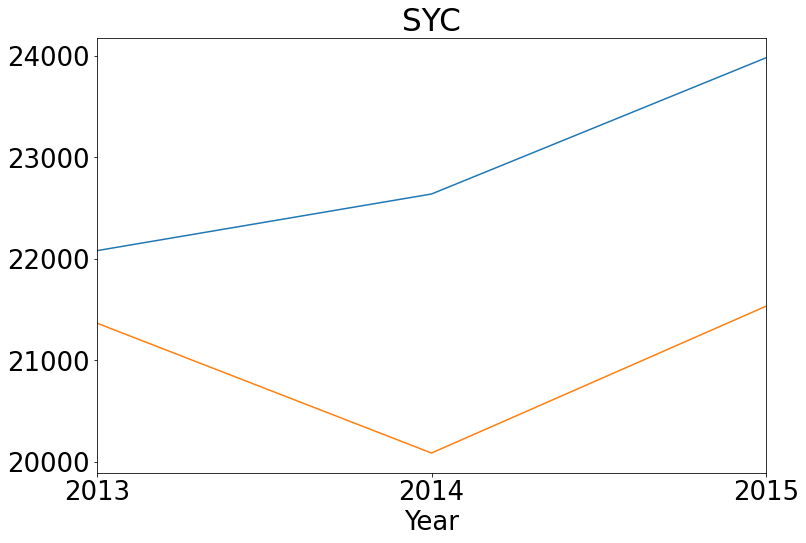

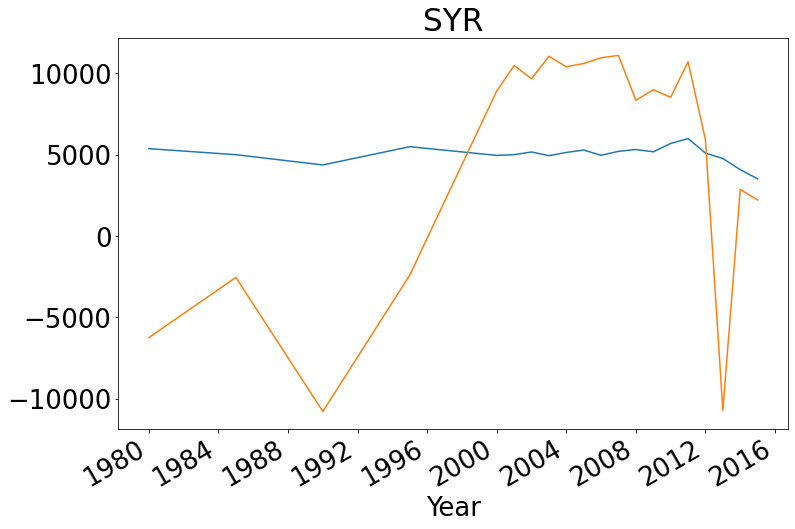

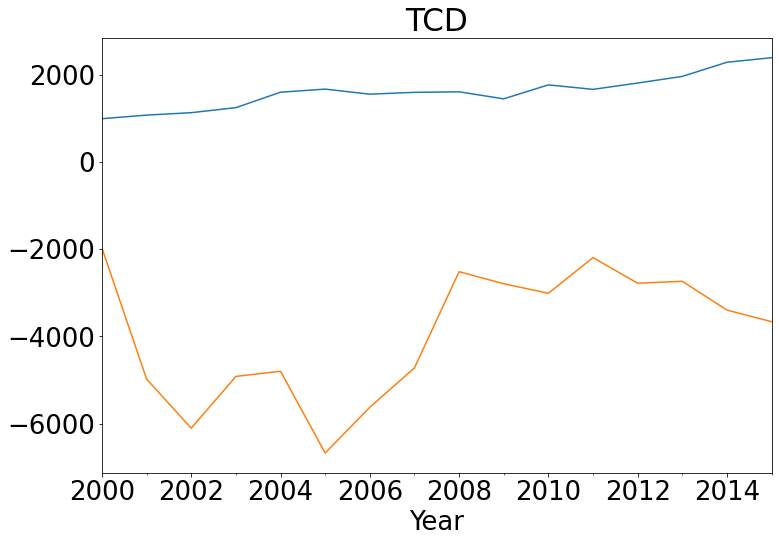

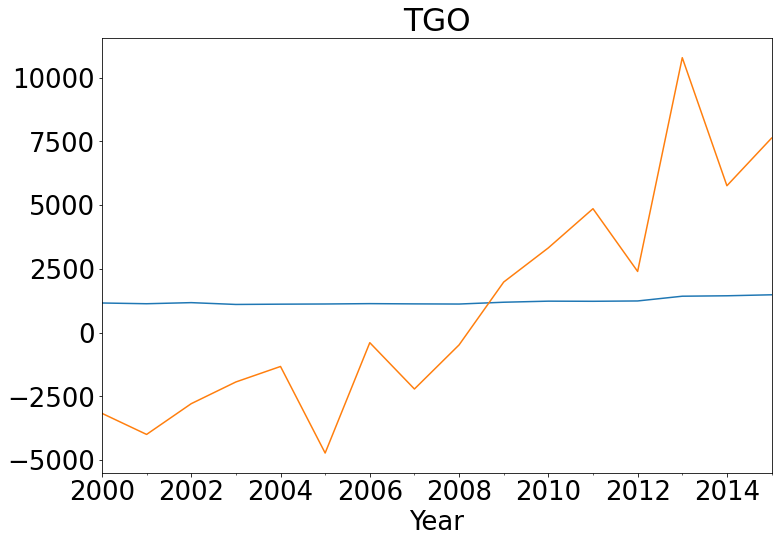

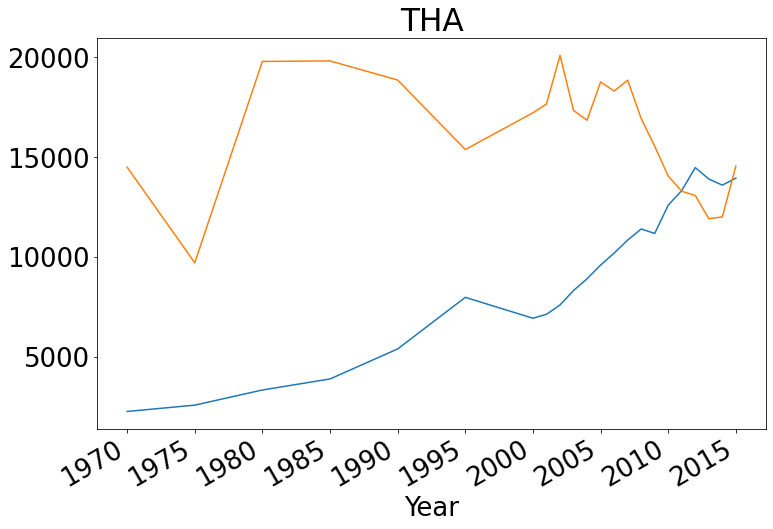

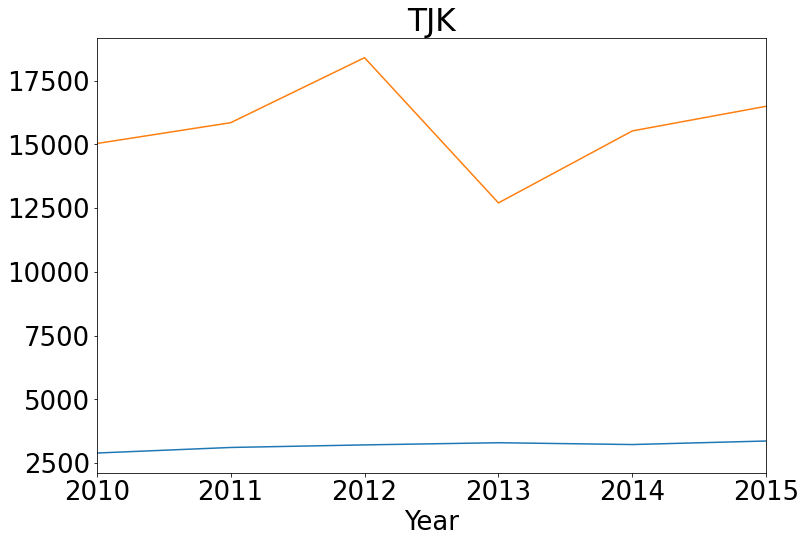

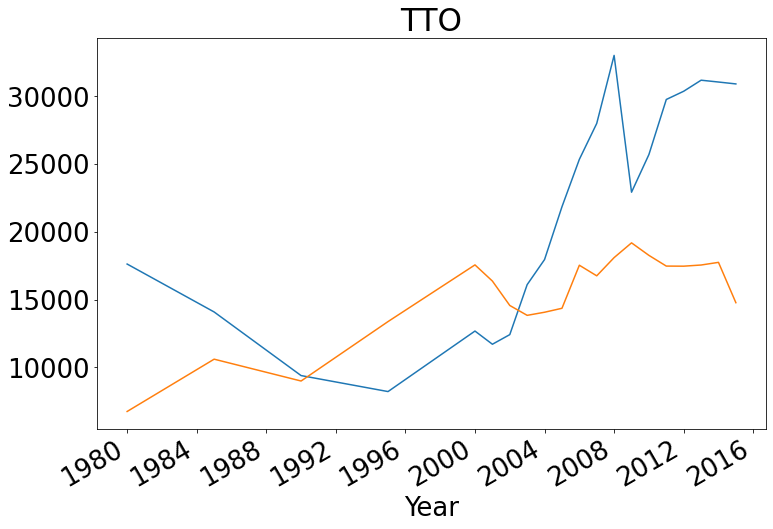

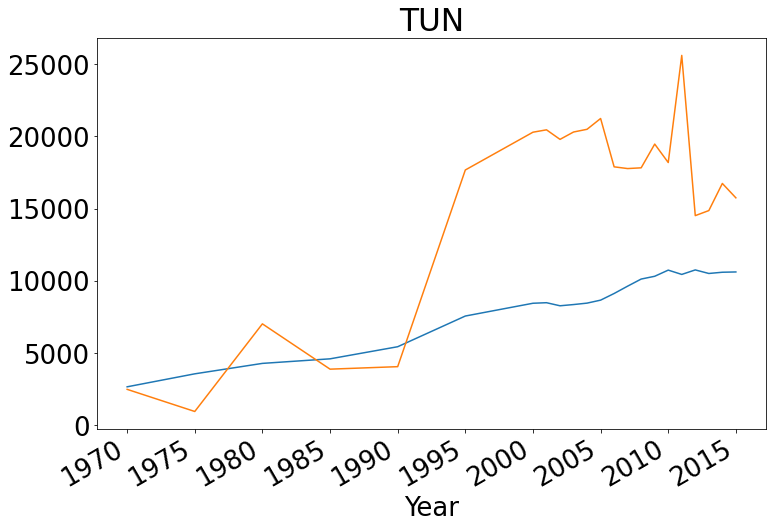

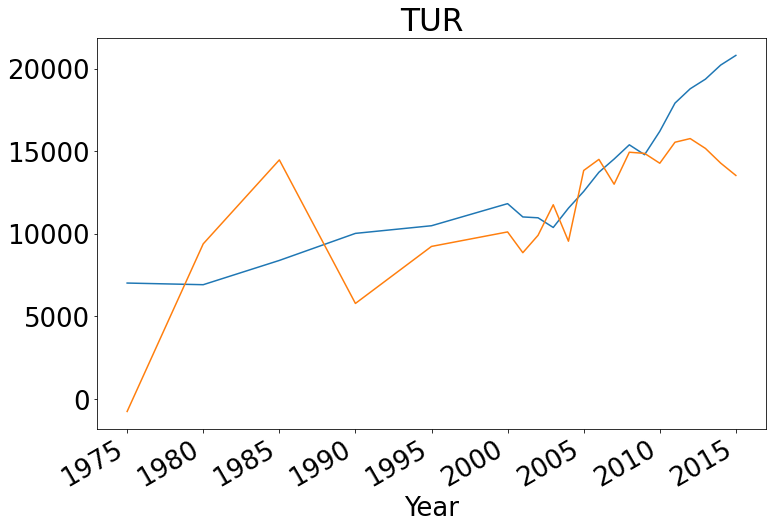

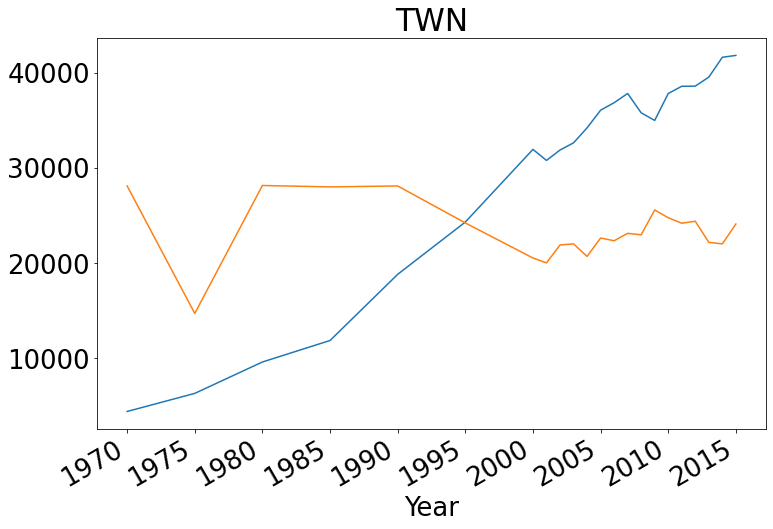

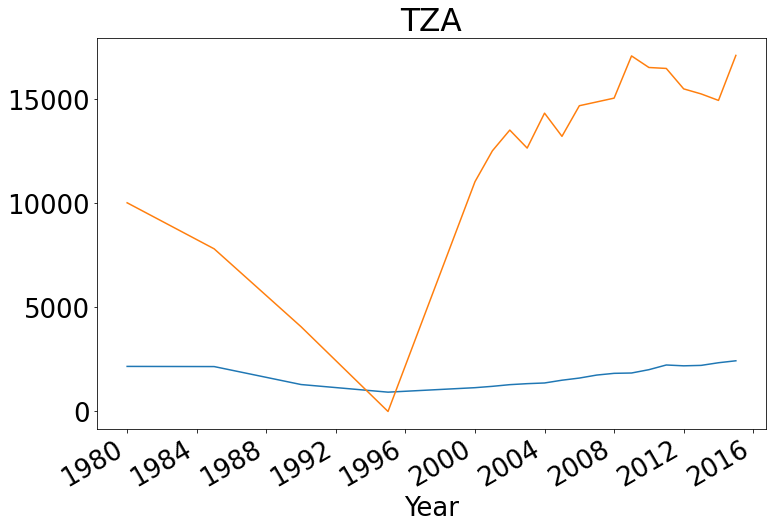

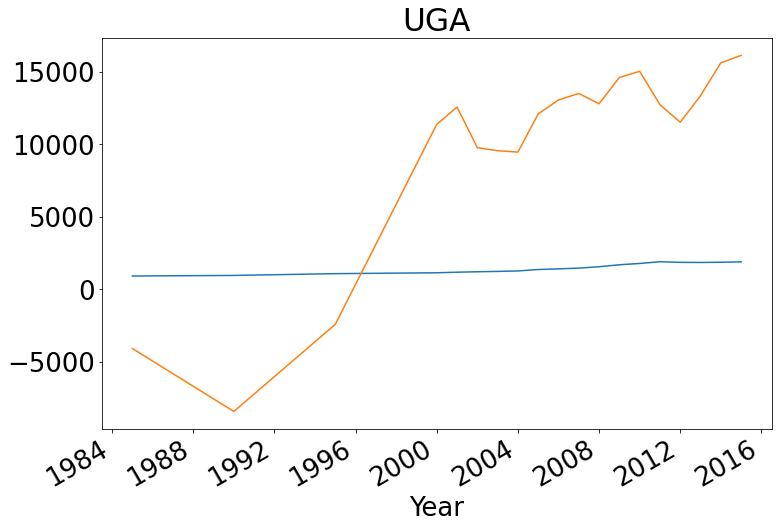

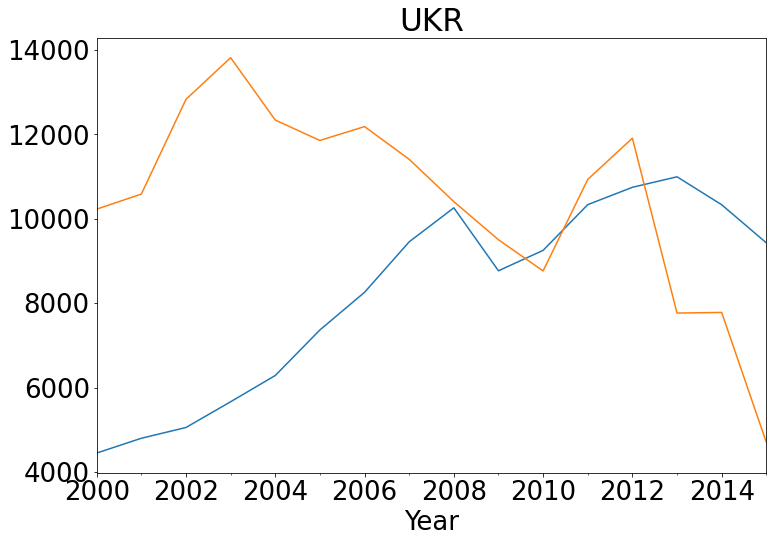

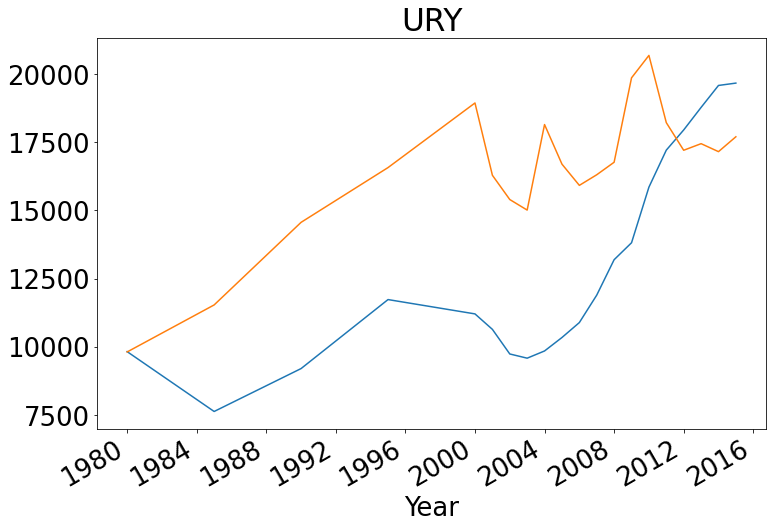

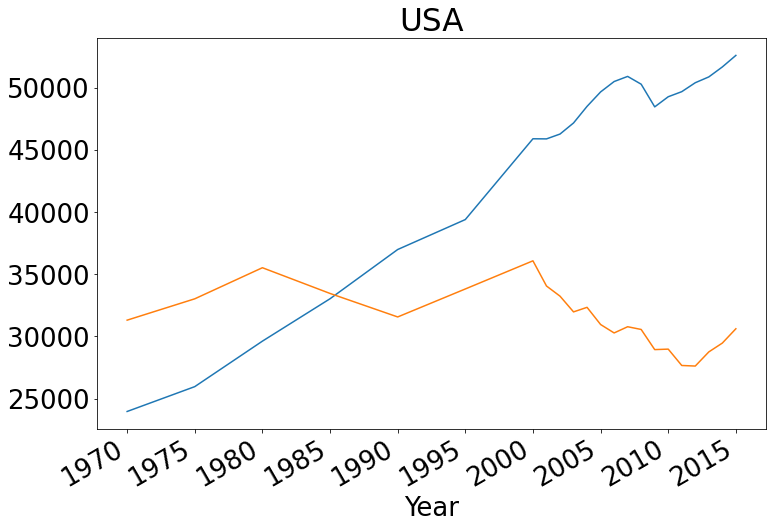

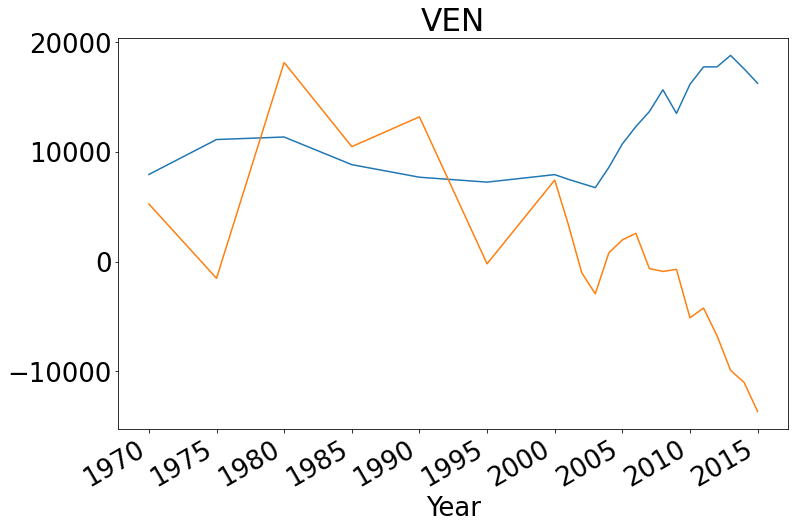

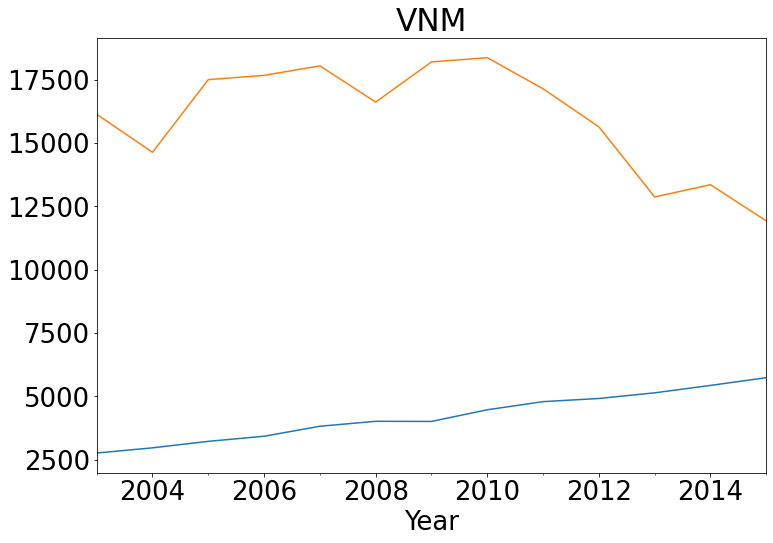

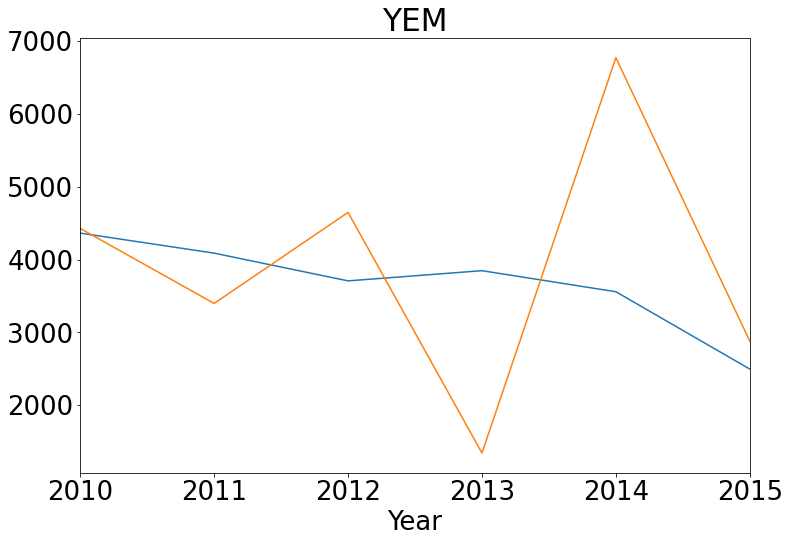

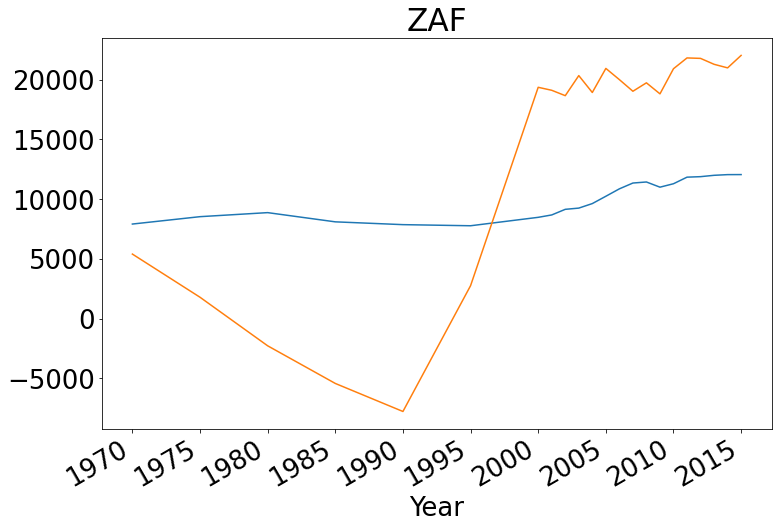

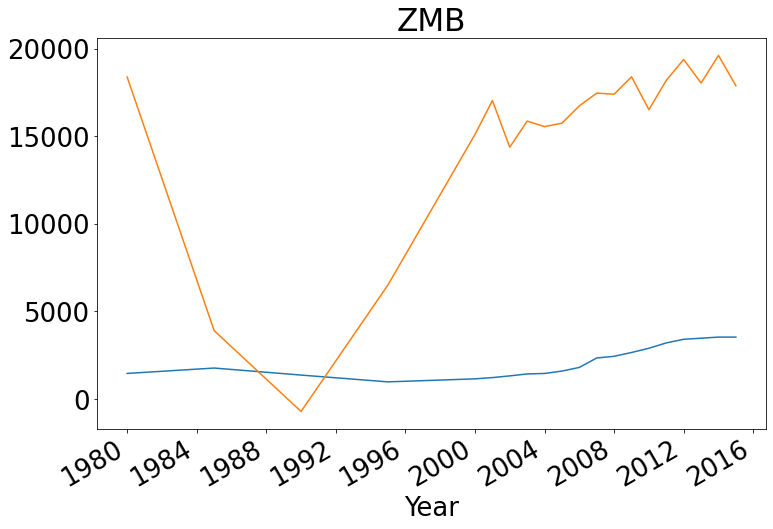

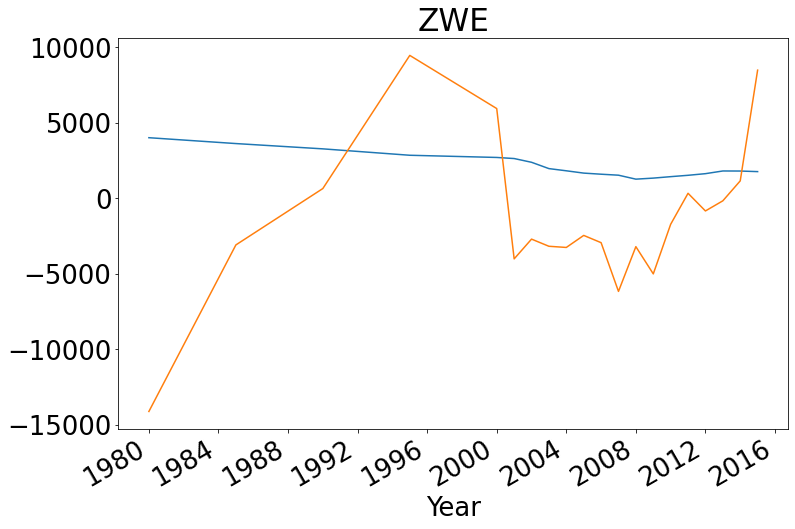

In [31]:
countries = reg_data.groupby("ISO_Code").mean().index
y_name, y_pred_name = y_var[0], y_var[0] + " Predictor"
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    reg_data[[y_name, y_pred_name]].loc[country].plot.line(ax = ax,
                                                          legend = False)
    ax.set_title(country)
    plt.plot()